### Digits Classification
#### Author: Marcus Madumo



In [1]:
import pandas as pd
import pickle
import scipy as sc
from scipy import misc
import os
import numpy as np
import matplotlib.pyplot as plt
from NeuralNetworks import ANN

dataPath_Train = os.path.join("..", "Datasets","mnist","mnist_train.csv")
dataPath_Test  = os.path.join("..", "Datasets","mnist","mnist_test.csv")

## Reading the csv into a dataframe  usually for cleaning and exploring the data 
# @--Better use machine learning studio--@
df_Train = pd.read_csv(dataPath_Train, header=None)
df_Test = pd.read_csv(dataPath_Test, header=None)

"""" 
 Pre-Processing
 Convert into numpy array representation when all is preprocessed
 Y = labels
 X = Features
 transposing the matrices to make examples columns instead of rows
"""""
Train = df_Train.as_matrix()
Test  = df_Test.as_matrix()
#Labels
Y_Train = Train[0:,0]    
Y_Test  = Test[0:,0]
#Features
X_Train = np.transpose(Train[:,1:])
X_Test  = np.transpose(Test[:,1:])


### Preview dimensions and feature values

Preview of Labels Dimensions
[5 0 4 ... 5 6 8]
(60000,)
Preview Features Dimensions
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(784, 60000)
Sample


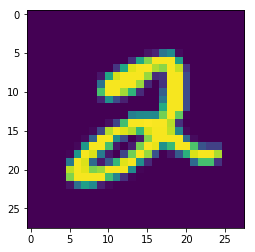

In [2]:

#Verify shapes
print("Preview of Labels Dimensions")
print(Y_Train)
print(np.shape(Y_Train))
print("Preview Features Dimensions")
print(X_Train)
print(np.shape(X_Train))
#Viewing sample images
sample = X_Train[:,5].reshape(28,28)
print("Sample")
plt.imshow(sample)

### Initializing Network 
Network Parameters
The number of neurons and layers in a network is defined by a list layer_dims where the length encodes the number of layers
and its elements as number of neurons

In [3]:
layer_dims = np.array([784,10,30,10])
#Declaring a new neural network
neuralnetwork = ANN(layer_dims,batch_size=1000,optimization="MBGD")


### Training

In [11]:
print("Training ...")
Y_encoded = neuralnetwork.one_hot_encoding(Y_Train)
neuralnetwork.train(X_Train,Y_encoded,10000, 0.001)

Training ...
Accuracy: -4.737147499056121
cycle 0
Accuracy: 1.2343567871048862
cycle 1
Accuracy: 4.557184552209492
cycle 2
Accuracy: 7.235809337766767
cycle 3
Accuracy: 9.594504199362603
cycle 4
Accuracy: 11.746383253577534
cycle 5
Accuracy: 13.74173106070262
cycle 6
Accuracy: 15.592293813944963
cycle 7
Accuracy: 17.329158568684093
cycle 8
Accuracy: 18.968021021627692
cycle 9
Accuracy: 20.511529005232163
cycle 10
Accuracy: 21.96949539598897
cycle 11
Accuracy: 23.35494525117187
cycle 12
Accuracy: 24.68934521327239
cycle 13
Accuracy: 25.96657263294142
cycle 14
Accuracy: 27.187365631054362
cycle 15
Accuracy: 28.367751456490993
cycle 16
Accuracy: 29.49686570161964
cycle 17
Accuracy: 30.57773112375837
cycle 18
Accuracy: 31.618745618248496
cycle 19
Accuracy: 32.62184807092309
cycle 20
Accuracy: 33.58564731615628
cycle 21
Accuracy: 34.51442621863231
cycle 22
Accuracy: 35.41133192314307
cycle 23
Accuracy: 36.27712794559509
cycle 24
Accuracy: 37.11492568049478
cycle 25
Accuracy: 37.926435241026

Accuracy: 83.27417528777438
cycle 224
Accuracy: 83.33875090625104
cycle 225
Accuracy: 83.40276903887002
cycle 226
Accuracy: 83.46639281480327
cycle 227
Accuracy: 83.52948619469214
cycle 228
Accuracy: 83.5919412276985
cycle 229
Accuracy: 83.65390915184156
cycle 230
Accuracy: 83.71550428948433
cycle 231
Accuracy: 83.77662489845315
cycle 232
Accuracy: 83.83722765428101
cycle 233
Accuracy: 83.89735841848537
cycle 234
Accuracy: 83.957198668183
cycle 235
Accuracy: 84.01651265582818
cycle 236
Accuracy: 84.0753056269959
cycle 237
Accuracy: 84.13365423162324
cycle 238
Accuracy: 84.19162598881852
cycle 239
Accuracy: 84.24920936136829
cycle 240
Accuracy: 84.3063632692549
cycle 241
Accuracy: 84.36312454043419
cycle 242
Accuracy: 84.41942454590678
cycle 243
Accuracy: 84.47543404151878
cycle 244
Accuracy: 84.53102551837452
cycle 245
Accuracy: 84.58624283742814
cycle 246
Accuracy: 84.64119477082761
cycle 247
Accuracy: 84.6959209784593
cycle 248
Accuracy: 84.75042022344708
cycle 249
Accuracy: 84.80454

Accuracy: 91.39151183847429
cycle 450
Accuracy: 91.41218538194765
cycle 451
Accuracy: 91.43295501874346
cycle 452
Accuracy: 91.45365281559982
cycle 453
Accuracy: 91.474268567126
cycle 454
Accuracy: 91.49482169573015
cycle 455
Accuracy: 91.51530587088686
cycle 456
Accuracy: 91.53559916060165
cycle 457
Accuracy: 91.55588250607548
cycle 458
Accuracy: 91.57616413450428
cycle 459
Accuracy: 91.59630591466627
cycle 460
Accuracy: 91.61639138693153
cycle 461
Accuracy: 91.63636087795302
cycle 462
Accuracy: 91.65619453437472
cycle 463
Accuracy: 91.6760067256812
cycle 464
Accuracy: 91.69574608422546
cycle 465
Accuracy: 91.71540194941338
cycle 466
Accuracy: 91.73498475929249
cycle 467
Accuracy: 91.75451560840682
cycle 468
Accuracy: 91.77386741705818
cycle 469
Accuracy: 91.7932234985807
cycle 470
Accuracy: 91.81247843701422
cycle 471
Accuracy: 91.83169698674347
cycle 472
Accuracy: 91.85083584166844
cycle 473
Accuracy: 91.86988629226278
cycle 474
Accuracy: 91.88874110194179
cycle 475
Accuracy: 91.907

Accuracy: 94.5727038022593
cycle 672
Accuracy: 94.58259338292766
cycle 673
Accuracy: 94.59244845441667
cycle 674
Accuracy: 94.60225363731887
cycle 675
Accuracy: 94.61207603046307
cycle 676
Accuracy: 94.62183386958631
cycle 677
Accuracy: 94.63152518595801
cycle 678
Accuracy: 94.64123060664916
cycle 679
Accuracy: 94.65094841070888
cycle 680
Accuracy: 94.66062546478591
cycle 681
Accuracy: 94.66992528636366
cycle 682
Accuracy: 94.67929213923998
cycle 683
Accuracy: 94.68863782040471
cycle 684
Accuracy: 94.69785108513456
cycle 685
Accuracy: 94.70700273586522
cycle 686
Accuracy: 94.71613096568117
cycle 687
Accuracy: 94.72544482447057
cycle 688
Accuracy: 94.7346057844255
cycle 689
Accuracy: 94.74374557031857
cycle 690
Accuracy: 94.75284862515437
cycle 691
Accuracy: 94.76189390088713
cycle 692
Accuracy: 94.77094343530462
cycle 693
Accuracy: 94.77995235288844
cycle 694
Accuracy: 94.78897010730115
cycle 695
Accuracy: 94.79790787984705
cycle 696
Accuracy: 94.8068766622697
cycle 697
Accuracy: 94.81

Accuracy: 96.22450041282697
cycle 899
Accuracy: 96.23009329091262
cycle 900
Accuracy: 96.23562925450192
cycle 901
Accuracy: 96.24117764588209
cycle 902
Accuracy: 96.24667832149214
cycle 903
Accuracy: 96.25212232006805
cycle 904
Accuracy: 96.25767958761605
cycle 905
Accuracy: 96.2631772039777
cycle 906
Accuracy: 96.2686562368487
cycle 907
Accuracy: 96.27407697956157
cycle 908
Accuracy: 96.27948190205855
cycle 909
Accuracy: 96.28497795714938
cycle 910
Accuracy: 96.2903948664765
cycle 911
Accuracy: 96.29583510314608
cycle 912
Accuracy: 96.30124135724394
cycle 913
Accuracy: 96.3065980384789
cycle 914
Accuracy: 96.31200823273744
cycle 915
Accuracy: 96.31735160527546
cycle 916
Accuracy: 96.32274146926801
cycle 917
Accuracy: 96.32806388341324
cycle 918
Accuracy: 96.33338743630728
cycle 919
Accuracy: 96.33874719470187
cycle 920
Accuracy: 96.34408180284873
cycle 921
Accuracy: 96.34939582847315
cycle 922
Accuracy: 96.35463270108708
cycle 923
Accuracy: 96.35994003289048
cycle 924
Accuracy: 96.365

Accuracy: 97.22076864639175
cycle 1123
Accuracy: 97.22428923571448
cycle 1124
Accuracy: 97.22776610320312
cycle 1125
Accuracy: 97.23123285536458
cycle 1126
Accuracy: 97.23471888219412
cycle 1127
Accuracy: 97.23820327093408
cycle 1128
Accuracy: 97.24168748827182
cycle 1129
Accuracy: 97.24514709970624
cycle 1130
Accuracy: 97.24859406560832
cycle 1131
Accuracy: 97.25200626055012
cycle 1132
Accuracy: 97.25545776746827
cycle 1133
Accuracy: 97.25891700631301
cycle 1134
Accuracy: 97.26234598367196
cycle 1135
Accuracy: 97.26575771647778
cycle 1136
Accuracy: 97.26915953125078
cycle 1137
Accuracy: 97.27256316182547
cycle 1138
Accuracy: 97.27597918056033
cycle 1139
Accuracy: 97.27936588467301
cycle 1140
Accuracy: 97.28273397998262
cycle 1141
Accuracy: 97.28612418301317
cycle 1142
Accuracy: 97.28949654763042
cycle 1143
Accuracy: 97.29286910326002
cycle 1144
Accuracy: 97.29624319750745
cycle 1145
Accuracy: 97.29957156153225
cycle 1146
Accuracy: 97.30289222643843
cycle 1147
Accuracy: 97.306247371470

Accuracy: 97.83326942161055
cycle 1337
Accuracy: 97.83558599330192
cycle 1338
Accuracy: 97.83791918014437
cycle 1339
Accuracy: 97.84020871913567
cycle 1340
Accuracy: 97.84253187203512
cycle 1341
Accuracy: 97.84483828674787
cycle 1342
Accuracy: 97.84712181710479
cycle 1343
Accuracy: 97.84943069629509
cycle 1344
Accuracy: 97.85172456473819
cycle 1345
Accuracy: 97.85402396625709
cycle 1346
Accuracy: 97.8562961941619
cycle 1347
Accuracy: 97.85857009046853
cycle 1348
Accuracy: 97.86087443729126
cycle 1349
Accuracy: 97.86314814849524
cycle 1350
Accuracy: 97.86540984511085
cycle 1351
Accuracy: 97.86766990614186
cycle 1352
Accuracy: 97.86994671453982
cycle 1353
Accuracy: 97.87221811922707
cycle 1354
Accuracy: 97.87445414391782
cycle 1355
Accuracy: 97.87671128423932
cycle 1356
Accuracy: 97.87895797409014
cycle 1357
Accuracy: 97.88120668861762
cycle 1358
Accuracy: 97.88344886488417
cycle 1359
Accuracy: 97.885663610597
cycle 1360
Accuracy: 97.88790967604533
cycle 1361
Accuracy: 97.8901388052342
c

Accuracy: 98.25158912987017
cycle 1552
Accuracy: 98.25320656490779
cycle 1553
Accuracy: 98.25481985659766
cycle 1554
Accuracy: 98.25642624963882
cycle 1555
Accuracy: 98.25804529136023
cycle 1556
Accuracy: 98.25965172835662
cycle 1557
Accuracy: 98.261249511286
cycle 1558
Accuracy: 98.262866882365
cycle 1559
Accuracy: 98.26446979464752
cycle 1560
Accuracy: 98.26606561614321
cycle 1561
Accuracy: 98.26765991763803
cycle 1562
Accuracy: 98.26925447416748
cycle 1563
Accuracy: 98.27085187066075
cycle 1564
Accuracy: 98.27244256037264
cycle 1565
Accuracy: 98.2740196328301
cycle 1566
Accuracy: 98.27561208462647
cycle 1567
Accuracy: 98.27718906019847
cycle 1568
Accuracy: 98.27876444683557
cycle 1569
Accuracy: 98.28033894667426
cycle 1570
Accuracy: 98.28192248792936
cycle 1571
Accuracy: 98.28350364507712
cycle 1572
Accuracy: 98.28505670801735
cycle 1573
Accuracy: 98.2866251809124
cycle 1574
Accuracy: 98.28819919636332
cycle 1575
Accuracy: 98.28975671267376
cycle 1576
Accuracy: 98.29130967039472
cyc

Accuracy: 98.5519223372157
cycle 1769
Accuracy: 98.55310227984603
cycle 1770
Accuracy: 98.55428741980077
cycle 1771
Accuracy: 98.55545565436971
cycle 1772
Accuracy: 98.55662321024926
cycle 1773
Accuracy: 98.55780850928961
cycle 1774
Accuracy: 98.55897876590676
cycle 1775
Accuracy: 98.56014722170637
cycle 1776
Accuracy: 98.56131589136638
cycle 1777
Accuracy: 98.56248447626055
cycle 1778
Accuracy: 98.56365516811546
cycle 1779
Accuracy: 98.56480815236023
cycle 1780
Accuracy: 98.5659749292284
cycle 1781
Accuracy: 98.56713955915964
cycle 1782
Accuracy: 98.56829661846977
cycle 1783
Accuracy: 98.56944723717976
cycle 1784
Accuracy: 98.5706020771699
cycle 1785
Accuracy: 98.57176286158207
cycle 1786
Accuracy: 98.57291858095066
cycle 1787
Accuracy: 98.57405974235897
cycle 1788
Accuracy: 98.57522094642908
cycle 1789
Accuracy: 98.57637038298336
cycle 1790
Accuracy: 98.57750804343938
cycle 1791
Accuracy: 98.57865377538673
cycle 1792
Accuracy: 98.57979809841285
cycle 1793
Accuracy: 98.58094417482286


Accuracy: 98.77877647022873
cycle 1991
Accuracy: 98.779665298384
cycle 1992
Accuracy: 98.78053983446499
cycle 1993
Accuracy: 98.78141833925919
cycle 1994
Accuracy: 98.78230330549384
cycle 1995
Accuracy: 98.78318567709027
cycle 1996
Accuracy: 98.78407211585225
cycle 1997
Accuracy: 98.78493776807368
cycle 1998
Accuracy: 98.78581685780146
cycle 1999
Accuracy: 98.78669578749312
cycle 2000
Accuracy: 98.78756385240163
cycle 2001
Accuracy: 98.78842780123182
cycle 2002
Accuracy: 98.78930658024713
cycle 2003
Accuracy: 98.79018278188047
cycle 2004
Accuracy: 98.79105255783848
cycle 2005
Accuracy: 98.7919216093611
cycle 2006
Accuracy: 98.79279559239804
cycle 2007
Accuracy: 98.79365451336356
cycle 2008
Accuracy: 98.7945156634923
cycle 2009
Accuracy: 98.79538383345486
cycle 2010
Accuracy: 98.79624432691037
cycle 2011
Accuracy: 98.79710779181192
cycle 2012
Accuracy: 98.79797240937685
cycle 2013
Accuracy: 98.79882839476547
cycle 2014
Accuracy: 98.79967209303581
cycle 2015
Accuracy: 98.80053995721863
c

Accuracy: 98.95214515376325
cycle 2205
Accuracy: 98.95285162309175
cycle 2206
Accuracy: 98.9535634323029
cycle 2207
Accuracy: 98.95426905162627
cycle 2208
Accuracy: 98.95497458527669
cycle 2209
Accuracy: 98.95567731074286
cycle 2210
Accuracy: 98.95636907976507
cycle 2211
Accuracy: 98.95707984352848
cycle 2212
Accuracy: 98.95778322038902
cycle 2213
Accuracy: 98.95847876940525
cycle 2214
Accuracy: 98.95918435328703
cycle 2215
Accuracy: 98.95987950638917
cycle 2216
Accuracy: 98.96056893070393
cycle 2217
Accuracy: 98.96127443274332
cycle 2218
Accuracy: 98.96197132862304
cycle 2219
Accuracy: 98.96266603168343
cycle 2220
Accuracy: 98.96336344303835
cycle 2221
Accuracy: 98.96404785584843
cycle 2222
Accuracy: 98.96474964403393
cycle 2223
Accuracy: 98.96544022689574
cycle 2224
Accuracy: 98.9661259819805
cycle 2225
Accuracy: 98.96682142551134
cycle 2226
Accuracy: 98.96751160015906
cycle 2227
Accuracy: 98.96818984301486
cycle 2228
Accuracy: 98.96888544508349
cycle 2229
Accuracy: 98.9695771786782


Accuracy: 99.09163868632984
cycle 2429
Accuracy: 99.09218454109063
cycle 2430
Accuracy: 99.09273062379133
cycle 2431
Accuracy: 99.09326187037286
cycle 2432
Accuracy: 99.09382853964223
cycle 2433
Accuracy: 99.09437046347904
cycle 2434
Accuracy: 99.09491688693565
cycle 2435
Accuracy: 99.09546117971182
cycle 2436
Accuracy: 99.09600173095909
cycle 2437
Accuracy: 99.09655309924011
cycle 2438
Accuracy: 99.0970884650571
cycle 2439
Accuracy: 99.09763576553624
cycle 2440
Accuracy: 99.09817301135867
cycle 2441
Accuracy: 99.09872528674147
cycle 2442
Accuracy: 99.09925859637045
cycle 2443
Accuracy: 99.09980129067003
cycle 2444
Accuracy: 99.10033492577759
cycle 2445
Accuracy: 99.10088363296889
cycle 2446
Accuracy: 99.10142114942664
cycle 2447
Accuracy: 99.10195830601165
cycle 2448
Accuracy: 99.10249596976585
cycle 2449
Accuracy: 99.10302547176234
cycle 2450
Accuracy: 99.10356926558806
cycle 2451
Accuracy: 99.10410912595371
cycle 2452
Accuracy: 99.10464248038484
cycle 2453
Accuracy: 99.1051769038755

Accuracy: 99.19653712688554
cycle 2642
Accuracy: 99.19699007513256
cycle 2643
Accuracy: 99.1974338602578
cycle 2644
Accuracy: 99.19787120678981
cycle 2645
Accuracy: 99.19831233606733
cycle 2646
Accuracy: 99.19874550044689
cycle 2647
Accuracy: 99.19918396032472
cycle 2648
Accuracy: 99.19963439381011
cycle 2649
Accuracy: 99.20007395551576
cycle 2650
Accuracy: 99.20051154806472
cycle 2651
Accuracy: 99.20094646542783
cycle 2652
Accuracy: 99.20138278540927
cycle 2653
Accuracy: 99.20181994707052
cycle 2654
Accuracy: 99.20226289870126
cycle 2655
Accuracy: 99.20269024083309
cycle 2656
Accuracy: 99.20312761573996
cycle 2657
Accuracy: 99.20356605443575
cycle 2658
Accuracy: 99.20400444421605
cycle 2659
Accuracy: 99.20443817109832
cycle 2660
Accuracy: 99.20487549454573
cycle 2661
Accuracy: 99.2053069662668
cycle 2662
Accuracy: 99.20574022318267
cycle 2663
Accuracy: 99.20617624345127
cycle 2664
Accuracy: 99.20660460843578
cycle 2665
Accuracy: 99.20703380073913
cycle 2666
Accuracy: 99.20747022966432

Accuracy: 99.28227661423045
cycle 2856
Accuracy: 99.28263812116847
cycle 2857
Accuracy: 99.28300020656096
cycle 2858
Accuracy: 99.28335675945519
cycle 2859
Accuracy: 99.28372736653871
cycle 2860
Accuracy: 99.28408466545159
cycle 2861
Accuracy: 99.28444499534106
cycle 2862
Accuracy: 99.28480119467551
cycle 2863
Accuracy: 99.28516696036132
cycle 2864
Accuracy: 99.28552688031075
cycle 2865
Accuracy: 99.28588820680044
cycle 2866
Accuracy: 99.28624419511902
cycle 2867
Accuracy: 99.28660373159549
cycle 2868
Accuracy: 99.2869650846201
cycle 2869
Accuracy: 99.2873194591632
cycle 2870
Accuracy: 99.28768162855707
cycle 2871
Accuracy: 99.28803949906705
cycle 2872
Accuracy: 99.2883962290455
cycle 2873
Accuracy: 99.28875026585717
cycle 2874
Accuracy: 99.28911336319545
cycle 2875
Accuracy: 99.28946695722348
cycle 2876
Accuracy: 99.2898248181715
cycle 2877
Accuracy: 99.29017969254372
cycle 2878
Accuracy: 99.29053296434658
cycle 2879
Accuracy: 99.29088907697101
cycle 2880
Accuracy: 99.29124673607504
c

Accuracy: 99.35284365881012
cycle 3069
Accuracy: 99.35314676743569
cycle 3070
Accuracy: 99.35344876514056
cycle 3071
Accuracy: 99.35374922728427
cycle 3072
Accuracy: 99.35405101264845
cycle 3073
Accuracy: 99.35435202319955
cycle 3074
Accuracy: 99.35465102003086
cycle 3075
Accuracy: 99.35495530499661
cycle 3076
Accuracy: 99.35525616914876
cycle 3077
Accuracy: 99.35555553309423
cycle 3078
Accuracy: 99.35585622430028
cycle 3079
Accuracy: 99.35615617045076
cycle 3080
Accuracy: 99.35645493705057
cycle 3081
Accuracy: 99.3567556546129
cycle 3082
Accuracy: 99.35705265456897
cycle 3083
Accuracy: 99.3573533993073
cycle 3084
Accuracy: 99.35765171160402
cycle 3085
Accuracy: 99.35794494461628
cycle 3086
Accuracy: 99.35825019757065
cycle 3087
Accuracy: 99.35854856968409
cycle 3088
Accuracy: 99.35884408575757
cycle 3089
Accuracy: 99.35914086337556
cycle 3090
Accuracy: 99.35944260242928
cycle 3091
Accuracy: 99.3597387431792
cycle 3092
Accuracy: 99.36003167705093
cycle 3093
Accuracy: 99.36033007180005


Accuracy: 99.41335533863041
cycle 3287
Accuracy: 99.41360740059365
cycle 3288
Accuracy: 99.4138619002862
cycle 3289
Accuracy: 99.41411473108744
cycle 3290
Accuracy: 99.4143669560162
cycle 3291
Accuracy: 99.41462509289867
cycle 3292
Accuracy: 99.41487468376035
cycle 3293
Accuracy: 99.41513104370073
cycle 3294
Accuracy: 99.41538382628863
cycle 3295
Accuracy: 99.4156364617949
cycle 3296
Accuracy: 99.41588804257205
cycle 3297
Accuracy: 99.41614385228374
cycle 3298
Accuracy: 99.41639667882714
cycle 3299
Accuracy: 99.4166465269002
cycle 3300
Accuracy: 99.41689638507846
cycle 3301
Accuracy: 99.41714704572429
cycle 3302
Accuracy: 99.41740176932886
cycle 3303
Accuracy: 99.41765141989302
cycle 3304
Accuracy: 99.41790404451466
cycle 3305
Accuracy: 99.4181561302248
cycle 3306
Accuracy: 99.41840179292046
cycle 3307
Accuracy: 99.41865706333982
cycle 3308
Accuracy: 99.41890828502365
cycle 3309
Accuracy: 99.4191565932285
cycle 3310
Accuracy: 99.41940777379224
cycle 3311
Accuracy: 99.4196593172334
cycl

Accuracy: 99.46419065648021
cycle 3503
Accuracy: 99.46440874401324
cycle 3504
Accuracy: 99.46462447745644
cycle 3505
Accuracy: 99.46484464827866
cycle 3506
Accuracy: 99.46506288220691
cycle 3507
Accuracy: 99.46527763023116
cycle 3508
Accuracy: 99.46549451464358
cycle 3509
Accuracy: 99.46570668857277
cycle 3510
Accuracy: 99.46592707425415
cycle 3511
Accuracy: 99.46614412430141
cycle 3512
Accuracy: 99.4663575900997
cycle 3513
Accuracy: 99.4665736145514
cycle 3514
Accuracy: 99.46679016193279
cycle 3515
Accuracy: 99.46700643421886
cycle 3516
Accuracy: 99.467220051537
cycle 3517
Accuracy: 99.46743868545595
cycle 3518
Accuracy: 99.46765109908308
cycle 3519
Accuracy: 99.46786524324713
cycle 3520
Accuracy: 99.46808240660916
cycle 3521
Accuracy: 99.4682933590437
cycle 3522
Accuracy: 99.46851006784253
cycle 3523
Accuracy: 99.46872513734327
cycle 3524
Accuracy: 99.46893659605114
cycle 3525
Accuracy: 99.46915116330636
cycle 3526
Accuracy: 99.46936641201202
cycle 3527
Accuracy: 99.46958069681357
cy

Accuracy: 99.50890380411809
cycle 3725
Accuracy: 99.50909063610617
cycle 3726
Accuracy: 99.50927649357038
cycle 3727
Accuracy: 99.50946226715816
cycle 3728
Accuracy: 99.5096513146181
cycle 3729
Accuracy: 99.50983679437412
cycle 3730
Accuracy: 99.51002108061034
cycle 3731
Accuracy: 99.51020684069648
cycle 3732
Accuracy: 99.51039172596462
cycle 3733
Accuracy: 99.5105787132457
cycle 3734
Accuracy: 99.51076346152874
cycle 3735
Accuracy: 99.510947497168
cycle 3736
Accuracy: 99.51113401149946
cycle 3737
Accuracy: 99.51132009832004
cycle 3738
Accuracy: 99.51150364097302
cycle 3739
Accuracy: 99.51168560121032
cycle 3740
Accuracy: 99.51187416955335
cycle 3741
Accuracy: 99.51205710346683
cycle 3742
Accuracy: 99.512240952354
cycle 3743
Accuracy: 99.51242522749573
cycle 3744
Accuracy: 99.51260818120588
cycle 3745
Accuracy: 99.5127945568969
cycle 3746
Accuracy: 99.51297786839326
cycle 3747
Accuracy: 99.51316168486913
cycle 3748
Accuracy: 99.51334575460075
cycle 3749
Accuracy: 99.51352915903226
cycl

Accuracy: 99.54583511374443
cycle 3937
Accuracy: 99.54599927120736
cycle 3938
Accuracy: 99.54616191709172
cycle 3939
Accuracy: 99.54632268512947
cycle 3940
Accuracy: 99.5464824995065
cycle 3941
Accuracy: 99.54664870418387
cycle 3942
Accuracy: 99.54681121816289
cycle 3943
Accuracy: 99.54697155069856
cycle 3944
Accuracy: 99.54713377713816
cycle 3945
Accuracy: 99.54729202685328
cycle 3946
Accuracy: 99.54745289928915
cycle 3947
Accuracy: 99.54761868774733
cycle 3948
Accuracy: 99.5477802017727
cycle 3949
Accuracy: 99.54794209839568
cycle 3950
Accuracy: 99.54810276832379
cycle 3951
Accuracy: 99.54826303205917
cycle 3952
Accuracy: 99.54842337305378
cycle 3953
Accuracy: 99.54858595443841
cycle 3954
Accuracy: 99.54874572733121
cycle 3955
Accuracy: 99.54890705485595
cycle 3956
Accuracy: 99.549069060251
cycle 3957
Accuracy: 99.54922681460141
cycle 3958
Accuracy: 99.549387565981
cycle 3959
Accuracy: 99.54954910467683
cycle 3960
Accuracy: 99.54970923318571
cycle 3961
Accuracy: 99.54986947512411
cyc

Accuracy: 99.57898537581528
cycle 4155
Accuracy: 99.5791274599227
cycle 4156
Accuracy: 99.57927020277769
cycle 4157
Accuracy: 99.57941221487654
cycle 4158
Accuracy: 99.57955267900164
cycle 4159
Accuracy: 99.57969336158409
cycle 4160
Accuracy: 99.57983791337632
cycle 4161
Accuracy: 99.57997844349218
cycle 4162
Accuracy: 99.58012013282912
cycle 4163
Accuracy: 99.58026155293928
cycle 4164
Accuracy: 99.58040125972123
cycle 4165
Accuracy: 99.58054479991446
cycle 4166
Accuracy: 99.5806854549365
cycle 4167
Accuracy: 99.58082700088518
cycle 4168
Accuracy: 99.58096751072831
cycle 4169
Accuracy: 99.5811094670684
cycle 4170
Accuracy: 99.58125025104742
cycle 4171
Accuracy: 99.58139100346055
cycle 4172
Accuracy: 99.58153292142691
cycle 4173
Accuracy: 99.58167255375437
cycle 4174
Accuracy: 99.58181258007735
cycle 4175
Accuracy: 99.58195211930062
cycle 4176
Accuracy: 99.58208999749455
cycle 4177
Accuracy: 99.58223489524106
cycle 4178
Accuracy: 99.58237434688287
cycle 4179
Accuracy: 99.58251408925885


Accuracy: 99.60821096104449
cycle 4374
Accuracy: 99.60833720380391
cycle 4375
Accuracy: 99.60846209669715
cycle 4376
Accuracy: 99.60858756905095
cycle 4377
Accuracy: 99.60871246576099
cycle 4378
Accuracy: 99.60883735883677
cycle 4379
Accuracy: 99.60896170887477
cycle 4380
Accuracy: 99.60908652542223
cycle 4381
Accuracy: 99.60921154473675
cycle 4382
Accuracy: 99.6093362817843
cycle 4383
Accuracy: 99.60946166669156
cycle 4384
Accuracy: 99.60958483230151
cycle 4385
Accuracy: 99.60970879678578
cycle 4386
Accuracy: 99.60983394625511
cycle 4387
Accuracy: 99.60995842138205
cycle 4388
Accuracy: 99.61008284180667
cycle 4389
Accuracy: 99.61020634962823
cycle 4390
Accuracy: 99.61033067473666
cycle 4391
Accuracy: 99.61045227046581
cycle 4392
Accuracy: 99.61057891812987
cycle 4393
Accuracy: 99.61070291066594
cycle 4394
Accuracy: 99.61082593245834
cycle 4395
Accuracy: 99.61094956868268
cycle 4396
Accuracy: 99.61107399814037
cycle 4397
Accuracy: 99.61119774544966
cycle 4398
Accuracy: 99.6113201766258

Accuracy: 99.63325893436628
cycle 4586
Accuracy: 99.63337099053405
cycle 4587
Accuracy: 99.63348236764621
cycle 4588
Accuracy: 99.63359263194084
cycle 4589
Accuracy: 99.63370397312858
cycle 4590
Accuracy: 99.6338149589998
cycle 4591
Accuracy: 99.6339270566911
cycle 4592
Accuracy: 99.63403759807657
cycle 4593
Accuracy: 99.63414963990114
cycle 4594
Accuracy: 99.63425989359783
cycle 4595
Accuracy: 99.63437160454579
cycle 4596
Accuracy: 99.6344827055604
cycle 4597
Accuracy: 99.63459164173277
cycle 4598
Accuracy: 99.6347024697704
cycle 4599
Accuracy: 99.6348116559544
cycle 4600
Accuracy: 99.63492528288926
cycle 4601
Accuracy: 99.63503454923192
cycle 4602
Accuracy: 99.63514637876094
cycle 4603
Accuracy: 99.63525665923527
cycle 4604
Accuracy: 99.63536665527158
cycle 4605
Accuracy: 99.6354773704351
cycle 4606
Accuracy: 99.63558641814195
cycle 4607
Accuracy: 99.63569541013392
cycle 4608
Accuracy: 99.63580707822078
cycle 4609
Accuracy: 99.63591743778896
cycle 4610
Accuracy: 99.63602755286128
cyc

Accuracy: 99.65623096127733
cycle 4804
Accuracy: 99.65633156141631
cycle 4805
Accuracy: 99.65643143725721
cycle 4806
Accuracy: 99.65653171421037
cycle 4807
Accuracy: 99.65662987235245
cycle 4808
Accuracy: 99.65673033639163
cycle 4809
Accuracy: 99.65683008170609
cycle 4810
Accuracy: 99.65692939116155
cycle 4811
Accuracy: 99.65702758809023
cycle 4812
Accuracy: 99.65712625149709
cycle 4813
Accuracy: 99.65722684396792
cycle 4814
Accuracy: 99.65732543854197
cycle 4815
Accuracy: 99.65742544082116
cycle 4816
Accuracy: 99.65752421018551
cycle 4817
Accuracy: 99.65762288661138
cycle 4818
Accuracy: 99.65772207349929
cycle 4819
Accuracy: 99.6578202566095
cycle 4820
Accuracy: 99.6579198196705
cycle 4821
Accuracy: 99.65801823616263
cycle 4822
Accuracy: 99.65811684556328
cycle 4823
Accuracy: 99.65821487246299
cycle 4824
Accuracy: 99.65831505794529
cycle 4825
Accuracy: 99.65841337417015
cycle 4826
Accuracy: 99.65851162559682
cycle 4827
Accuracy: 99.65861128483633
cycle 4828
Accuracy: 99.65870854390913

Accuracy: 99.6769823573953
cycle 5020
Accuracy: 99.67708536057604
cycle 5021
Accuracy: 99.67718855559679
cycle 5022
Accuracy: 99.67729190470733
cycle 5023
Accuracy: 99.67739396577556
cycle 5024
Accuracy: 99.6774966809362
cycle 5025
Accuracy: 99.67759752277716
cycle 5026
Accuracy: 99.67770032055115
cycle 5027
Accuracy: 99.67780216366539
cycle 5028
Accuracy: 99.67790420284506
cycle 5029
Accuracy: 99.6780057323202
cycle 5030
Accuracy: 99.67810664754299
cycle 5031
Accuracy: 99.67820898282746
cycle 5032
Accuracy: 99.67831029996954
cycle 5033
Accuracy: 99.6784115900626
cycle 5034
Accuracy: 99.67851185486332
cycle 5035
Accuracy: 99.67861347331124
cycle 5036
Accuracy: 99.6787139631641
cycle 5037
Accuracy: 99.67881532627744
cycle 5038
Accuracy: 99.67891502731216
cycle 5039
Accuracy: 99.67901612734114
cycle 5040
Accuracy: 99.67911549577966
cycle 5041
Accuracy: 99.67921646769527
cycle 5042
Accuracy: 99.67931668741842
cycle 5043
Accuracy: 99.67941665487984
cycle 5044
Accuracy: 99.67951627942524
cy

Accuracy: 99.69716894216967
cycle 5236
Accuracy: 99.69725511851883
cycle 5237
Accuracy: 99.69734123146148
cycle 5238
Accuracy: 99.6974271141717
cycle 5239
Accuracy: 99.69751305831602
cycle 5240
Accuracy: 99.69759911697786
cycle 5241
Accuracy: 99.69768484928272
cycle 5242
Accuracy: 99.6977707295919
cycle 5243
Accuracy: 99.69785722212153
cycle 5244
Accuracy: 99.69794281375026
cycle 5245
Accuracy: 99.69802797876187
cycle 5246
Accuracy: 99.6981139167542
cycle 5247
Accuracy: 99.6981999236057
cycle 5248
Accuracy: 99.69828551882112
cycle 5249
Accuracy: 99.69837106872545
cycle 5250
Accuracy: 99.69845703878585
cycle 5251
Accuracy: 99.69854119825483
cycle 5252
Accuracy: 99.6986273923229
cycle 5253
Accuracy: 99.69871260142274
cycle 5254
Accuracy: 99.69879793449584
cycle 5255
Accuracy: 99.69888345035874
cycle 5256
Accuracy: 99.69896934168852
cycle 5257
Accuracy: 99.69905354223842
cycle 5258
Accuracy: 99.69913861680398
cycle 5259
Accuracy: 99.69922430275837
cycle 5260
Accuracy: 99.69931010059148
cy

Accuracy: 99.71493790597575
cycle 5455
Accuracy: 99.7150139281933
cycle 5456
Accuracy: 99.71509035165444
cycle 5457
Accuracy: 99.71516613441156
cycle 5458
Accuracy: 99.71524283106044
cycle 5459
Accuracy: 99.7153192921953
cycle 5460
Accuracy: 99.71539537443462
cycle 5461
Accuracy: 99.71547152107348
cycle 5462
Accuracy: 99.71554709964389
cycle 5463
Accuracy: 99.71562316795536
cycle 5464
Accuracy: 99.71569958638769
cycle 5465
Accuracy: 99.71577535738224
cycle 5466
Accuracy: 99.71585114377406
cycle 5467
Accuracy: 99.71592683848951
cycle 5468
Accuracy: 99.71600295428699
cycle 5469
Accuracy: 99.71607856994599
cycle 5470
Accuracy: 99.7161541732414
cycle 5471
Accuracy: 99.71622967727015
cycle 5472
Accuracy: 99.71630526490773
cycle 5473
Accuracy: 99.71638096609611
cycle 5474
Accuracy: 99.71645720177794
cycle 5475
Accuracy: 99.71653211764118
cycle 5476
Accuracy: 99.71660755708773
cycle 5477
Accuracy: 99.7166831986606
cycle 5478
Accuracy: 99.71675835757405
cycle 5479
Accuracy: 99.71683377138366
c

Accuracy: 99.73061863316943
cycle 5672
Accuracy: 99.73068775289667
cycle 5673
Accuracy: 99.73075629324951
cycle 5674
Accuracy: 99.73082402777545
cycle 5675
Accuracy: 99.73089217031783
cycle 5676
Accuracy: 99.73096080688391
cycle 5677
Accuracy: 99.73102922240803
cycle 5678
Accuracy: 99.73109757692474
cycle 5679
Accuracy: 99.7311657853318
cycle 5680
Accuracy: 99.73123352581314
cycle 5681
Accuracy: 99.73130215719637
cycle 5682
Accuracy: 99.7313702253754
cycle 5683
Accuracy: 99.73143811404476
cycle 5684
Accuracy: 99.7315064364278
cycle 5685
Accuracy: 99.73157445946235
cycle 5686
Accuracy: 99.73164140707723
cycle 5687
Accuracy: 99.731709757972
cycle 5688
Accuracy: 99.73177794708766
cycle 5689
Accuracy: 99.7318457279057
cycle 5690
Accuracy: 99.73191397387856
cycle 5691
Accuracy: 99.73198168023342
cycle 5692
Accuracy: 99.73204930161752
cycle 5693
Accuracy: 99.73211724569069
cycle 5694
Accuracy: 99.7321849947339
cycle 5695
Accuracy: 99.73225235416803
cycle 5696
Accuracy: 99.73232016124336
cycl

Accuracy: 99.74460978791036
cycle 5887
Accuracy: 99.74467196294768
cycle 5888
Accuracy: 99.74473403677095
cycle 5889
Accuracy: 99.74479607306648
cycle 5890
Accuracy: 99.74485719045968
cycle 5891
Accuracy: 99.74491891555269
cycle 5892
Accuracy: 99.74498083526653
cycle 5893
Accuracy: 99.74504251714052
cycle 5894
Accuracy: 99.74510352977407
cycle 5895
Accuracy: 99.74516592679042
cycle 5896
Accuracy: 99.74522756902819
cycle 5897
Accuracy: 99.74528927147279
cycle 5898
Accuracy: 99.7453510658518
cycle 5899
Accuracy: 99.74541236557398
cycle 5900
Accuracy: 99.74547411376456
cycle 5901
Accuracy: 99.74553531193948
cycle 5902
Accuracy: 99.74559683745183
cycle 5903
Accuracy: 99.74565825165884
cycle 5904
Accuracy: 99.74571894865575
cycle 5905
Accuracy: 99.7457806384976
cycle 5906
Accuracy: 99.74584243729353
cycle 5907
Accuracy: 99.74590344520443
cycle 5908
Accuracy: 99.74596493928082
cycle 5909
Accuracy: 99.74602644420587
cycle 5910
Accuracy: 99.74608713050378
cycle 5911
Accuracy: 99.74614868782089

Accuracy: 99.75763522476207
cycle 6108
Accuracy: 99.75769106059666
cycle 6109
Accuracy: 99.75774853875443
cycle 6110
Accuracy: 99.75780508252987
cycle 6111
Accuracy: 99.75786200504467
cycle 6112
Accuracy: 99.7579191203155
cycle 6113
Accuracy: 99.75797548790091
cycle 6114
Accuracy: 99.75803297714293
cycle 6115
Accuracy: 99.75808959236173
cycle 6116
Accuracy: 99.75814593690649
cycle 6117
Accuracy: 99.75820306767054
cycle 6118
Accuracy: 99.75825940390067
cycle 6119
Accuracy: 99.7583159000178
cycle 6120
Accuracy: 99.75837261516104
cycle 6121
Accuracy: 99.75842940516202
cycle 6122
Accuracy: 99.75848650533283
cycle 6123
Accuracy: 99.75854256099764
cycle 6124
Accuracy: 99.75859917041595
cycle 6125
Accuracy: 99.75865604003847
cycle 6126
Accuracy: 99.75871242083238
cycle 6127
Accuracy: 99.75876920438995
cycle 6128
Accuracy: 99.75882494510385
cycle 6129
Accuracy: 99.75888169126785
cycle 6130
Accuracy: 99.75893803414827
cycle 6131
Accuracy: 99.75899442866474
cycle 6132
Accuracy: 99.75905091831605

Accuracy: 99.76946892011051
cycle 6326
Accuracy: 99.7695204262105
cycle 6327
Accuracy: 99.76957216818545
cycle 6328
Accuracy: 99.76962410554503
cycle 6329
Accuracy: 99.76967604041523
cycle 6330
Accuracy: 99.76972751081408
cycle 6331
Accuracy: 99.76977903684504
cycle 6332
Accuracy: 99.76983095124679
cycle 6333
Accuracy: 99.76988264874494
cycle 6334
Accuracy: 99.76993377677336
cycle 6335
Accuracy: 99.76998524924198
cycle 6336
Accuracy: 99.77003700884592
cycle 6337
Accuracy: 99.77008808834466
cycle 6338
Accuracy: 99.7701401480037
cycle 6339
Accuracy: 99.77019117746833
cycle 6340
Accuracy: 99.77024274531118
cycle 6341
Accuracy: 99.77029411190408
cycle 6342
Accuracy: 99.77034538506462
cycle 6343
Accuracy: 99.7703970179737
cycle 6344
Accuracy: 99.77044835216284
cycle 6345
Accuracy: 99.77049981533786
cycle 6346
Accuracy: 99.77055072037987
cycle 6347
Accuracy: 99.77060202415943
cycle 6348
Accuracy: 99.77065338159305
cycle 6349
Accuracy: 99.77070502736787
cycle 6350
Accuracy: 99.77075602145692


Accuracy: 99.78039546072941
cycle 6547
Accuracy: 99.7804426637106
cycle 6548
Accuracy: 99.7804895264849
cycle 6549
Accuracy: 99.78053734901233
cycle 6550
Accuracy: 99.7805843881833
cycle 6551
Accuracy: 99.7806317245901
cycle 6552
Accuracy: 99.78067871029637
cycle 6553
Accuracy: 99.78072614349948
cycle 6554
Accuracy: 99.78077286054126
cycle 6555
Accuracy: 99.78081979695789
cycle 6556
Accuracy: 99.78086721621091
cycle 6557
Accuracy: 99.7809141755126
cycle 6558
Accuracy: 99.78096120710478
cycle 6559
Accuracy: 99.78100792651684
cycle 6560
Accuracy: 99.78105522321304
cycle 6561
Accuracy: 99.78110218538126
cycle 6562
Accuracy: 99.78114855273337
cycle 6563
Accuracy: 99.78119583358264
cycle 6564
Accuracy: 99.78124305681587
cycle 6565
Accuracy: 99.78128980072091
cycle 6566
Accuracy: 99.78133669118336
cycle 6567
Accuracy: 99.78138362139285
cycle 6568
Accuracy: 99.78143055333464
cycle 6569
Accuracy: 99.78147688292698
cycle 6570
Accuracy: 99.781524303705
cycle 6571
Accuracy: 99.78157070350922
cycl

Accuracy: 99.79009268030498
cycle 6761
Accuracy: 99.79013609859388
cycle 6762
Accuracy: 99.79017971811055
cycle 6763
Accuracy: 99.79022307152968
cycle 6764
Accuracy: 99.79026601518169
cycle 6765
Accuracy: 99.79030960376569
cycle 6766
Accuracy: 99.79035296642485
cycle 6767
Accuracy: 99.79039637036146
cycle 6768
Accuracy: 99.79043948071711
cycle 6769
Accuracy: 99.7904829146764
cycle 6770
Accuracy: 99.79052646416376
cycle 6771
Accuracy: 99.79056925756402
cycle 6772
Accuracy: 99.79061296449206
cycle 6773
Accuracy: 99.79065562728628
cycle 6774
Accuracy: 99.79069906843947
cycle 6775
Accuracy: 99.79074195316562
cycle 6776
Accuracy: 99.79078569006172
cycle 6777
Accuracy: 99.79082824681846
cycle 6778
Accuracy: 99.79087174330587
cycle 6779
Accuracy: 99.79091508876917
cycle 6780
Accuracy: 99.79095764248473
cycle 6781
Accuracy: 99.79100089117686
cycle 6782
Accuracy: 99.79104393309876
cycle 6783
Accuracy: 99.79108710903519
cycle 6784
Accuracy: 99.79113000972819
cycle 6785
Accuracy: 99.7911730267305

Accuracy: 99.79891224531985
cycle 6972
Accuracy: 99.79895251711393
cycle 6973
Accuracy: 99.79899276438645
cycle 6974
Accuracy: 99.7990330086
cycle 6975
Accuracy: 99.79907306064689
cycle 6976
Accuracy: 99.79911338430426
cycle 6977
Accuracy: 99.79915349007922
cycle 6978
Accuracy: 99.79919362078849
cycle 6979
Accuracy: 99.7992331498619
cycle 6980
Accuracy: 99.79927349379876
cycle 6981
Accuracy: 99.79931357215317
cycle 6982
Accuracy: 99.79935403034013
cycle 6983
Accuracy: 99.79939402835613
cycle 6984
Accuracy: 99.79943395046759
cycle 6985
Accuracy: 99.79947403837515
cycle 6986
Accuracy: 99.79951372707993
cycle 6987
Accuracy: 99.79955409634859
cycle 6988
Accuracy: 99.79959384710946
cycle 6989
Accuracy: 99.79963392314326
cycle 6990
Accuracy: 99.79967378122022
cycle 6991
Accuracy: 99.79971336868977
cycle 6992
Accuracy: 99.79975371405513
cycle 6993
Accuracy: 99.79979352748884
cycle 6994
Accuracy: 99.79983332428576
cycle 6995
Accuracy: 99.7998733780229
cycle 6996
Accuracy: 99.7999129040966
cycl

Accuracy: 99.80726392068621
cycle 7188
Accuracy: 99.80730147558991
cycle 7189
Accuracy: 99.8073384030459
cycle 7190
Accuracy: 99.80737582963262
cycle 7191
Accuracy: 99.80741256110824
cycle 7192
Accuracy: 99.80744999016105
cycle 7193
Accuracy: 99.8074872453147
cycle 7194
Accuracy: 99.80752422070431
cycle 7195
Accuracy: 99.8075614049157
cycle 7196
Accuracy: 99.80759849801501
cycle 7197
Accuracy: 99.80763560273915
cycle 7198
Accuracy: 99.807672662137
cycle 7199
Accuracy: 99.80770936102998
cycle 7200
Accuracy: 99.80774653654157
cycle 7201
Accuracy: 99.80778373169436
cycle 7202
Accuracy: 99.80782063612295
cycle 7203
Accuracy: 99.80785746921009
cycle 7204
Accuracy: 99.80789436515326
cycle 7205
Accuracy: 99.80793175945642
cycle 7206
Accuracy: 99.8079687507502
cycle 7207
Accuracy: 99.80800556613251
cycle 7208
Accuracy: 99.80804218993725
cycle 7209
Accuracy: 99.80807933391716
cycle 7210
Accuracy: 99.80811589292819
cycle 7211
Accuracy: 99.80815320792024
cycle 7212
Accuracy: 99.8081901310981
cycl

Accuracy: 99.81517177960978
cycle 7409
Accuracy: 99.81520608598885
cycle 7410
Accuracy: 99.81524053811191
cycle 7411
Accuracy: 99.81527481568527
cycle 7412
Accuracy: 99.81530937168733
cycle 7413
Accuracy: 99.81534374135515
cycle 7414
Accuracy: 99.81537803798842
cycle 7415
Accuracy: 99.81541240530504
cycle 7416
Accuracy: 99.8154466859914
cycle 7417
Accuracy: 99.81548063973375
cycle 7418
Accuracy: 99.81551531414482
cycle 7419
Accuracy: 99.81554974916753
cycle 7420
Accuracy: 99.81558390504843
cycle 7421
Accuracy: 99.81561812429231
cycle 7422
Accuracy: 99.8156522120931
cycle 7423
Accuracy: 99.81568672789014
cycle 7424
Accuracy: 99.81572097124099
cycle 7425
Accuracy: 99.8157551442035
cycle 7426
Accuracy: 99.81578948955085
cycle 7427
Accuracy: 99.81582346365117
cycle 7428
Accuracy: 99.81585753797089
cycle 7429
Accuracy: 99.8158919706634
cycle 7430
Accuracy: 99.81592587750674
cycle 7431
Accuracy: 99.81596027692318
cycle 7432
Accuracy: 99.81599427914784
cycle 7433
Accuracy: 99.81602868277956
c

Accuracy: 99.82231069389286
cycle 7624
Accuracy: 99.82234249617899
cycle 7625
Accuracy: 99.82237454434924
cycle 7626
Accuracy: 99.82240639251464
cycle 7627
Accuracy: 99.82243854982265
cycle 7628
Accuracy: 99.8224706175616
cycle 7629
Accuracy: 99.82250232411218
cycle 7630
Accuracy: 99.82253469868444
cycle 7631
Accuracy: 99.82256624888484
cycle 7632
Accuracy: 99.82259827576645
cycle 7633
Accuracy: 99.82263019360119
cycle 7634
Accuracy: 99.82266212213135
cycle 7635
Accuracy: 99.82269398628256
cycle 7636
Accuracy: 99.82272599974112
cycle 7637
Accuracy: 99.82275803097222
cycle 7638
Accuracy: 99.82278989598635
cycle 7639
Accuracy: 99.82282160101865
cycle 7640
Accuracy: 99.8228532143095
cycle 7641
Accuracy: 99.82288549329046
cycle 7642
Accuracy: 99.82291709179752
cycle 7643
Accuracy: 99.82294903533412
cycle 7644
Accuracy: 99.82298102264375
cycle 7645
Accuracy: 99.82301255505678
cycle 7646
Accuracy: 99.82304443477368
cycle 7647
Accuracy: 99.82307623770369
cycle 7648
Accuracy: 99.82310751875772

Accuracy: 99.82918800259414
cycle 7846
Accuracy: 99.82921848663567
cycle 7847
Accuracy: 99.82924877593956
cycle 7848
Accuracy: 99.82927961588564
cycle 7849
Accuracy: 99.8293096407492
cycle 7850
Accuracy: 99.82934041815628
cycle 7851
Accuracy: 99.82937067537027
cycle 7852
Accuracy: 99.8294007280078
cycle 7853
Accuracy: 99.82943141395477
cycle 7854
Accuracy: 99.82946176825979
cycle 7855
Accuracy: 99.82949171850166
cycle 7856
Accuracy: 99.82952225257125
cycle 7857
Accuracy: 99.82955253435279
cycle 7858
Accuracy: 99.82958297027713
cycle 7859
Accuracy: 99.82961311470498
cycle 7860
Accuracy: 99.82964328862856
cycle 7861
Accuracy: 99.82967381584527
cycle 7862
Accuracy: 99.82970373376587
cycle 7863
Accuracy: 99.82973411429532
cycle 7864
Accuracy: 99.82976445981079
cycle 7865
Accuracy: 99.82979453221186
cycle 7866
Accuracy: 99.82982499607326
cycle 7867
Accuracy: 99.82985496681053
cycle 7868
Accuracy: 99.82988498044278
cycle 7869
Accuracy: 99.82991527783733
cycle 7870
Accuracy: 99.82994534908362

Accuracy: 99.83554440932322
cycle 8063
Accuracy: 99.83557256275357
cycle 8064
Accuracy: 99.83560097088541
cycle 8065
Accuracy: 99.83562908262655
cycle 8066
Accuracy: 99.83565732161946
cycle 8067
Accuracy: 99.8356854926026
cycle 8068
Accuracy: 99.83571358319632
cycle 8069
Accuracy: 99.83574200468661
cycle 8070
Accuracy: 99.83576987705034
cycle 8071
Accuracy: 99.83579807091604
cycle 8072
Accuracy: 99.83582641416812
cycle 8073
Accuracy: 99.83585453293813
cycle 8074
Accuracy: 99.83588241623704
cycle 8075
Accuracy: 99.8359106585766
cycle 8076
Accuracy: 99.83593879084111
cycle 8077
Accuracy: 99.83596675638834
cycle 8078
Accuracy: 99.83599489629947
cycle 8079
Accuracy: 99.83602281701963
cycle 8080
Accuracy: 99.83605095412153
cycle 8081
Accuracy: 99.8360793103843
cycle 8082
Accuracy: 99.83610697084504
cycle 8083
Accuracy: 99.83613512026237
cycle 8084
Accuracy: 99.83616314741614
cycle 8085
Accuracy: 99.8361912075941
cycle 8086
Accuracy: 99.83621918736132
cycle 8087
Accuracy: 99.83624729020288
c

Accuracy: 99.84135462936688
cycle 8276
Accuracy: 99.84138105905326
cycle 8277
Accuracy: 99.84140737639778
cycle 8278
Accuracy: 99.84143378012378
cycle 8279
Accuracy: 99.8414600828606
cycle 8280
Accuracy: 99.84148634123918
cycle 8281
Accuracy: 99.84151263607582
cycle 8282
Accuracy: 99.84153908388144
cycle 8283
Accuracy: 99.84156552030588
cycle 8284
Accuracy: 99.84159148487358
cycle 8285
Accuracy: 99.84161809812106
cycle 8286
Accuracy: 99.841644169272
cycle 8287
Accuracy: 99.84167054211815
cycle 8288
Accuracy: 99.84169679918479
cycle 8289
Accuracy: 99.84172303623973
cycle 8290
Accuracy: 99.84174938774542
cycle 8291
Accuracy: 99.84177550836472
cycle 8292
Accuracy: 99.8418019193271
cycle 8293
Accuracy: 99.84182803536325
cycle 8294
Accuracy: 99.84185429651824
cycle 8295
Accuracy: 99.84188059949214
cycle 8296
Accuracy: 99.84190650715838
cycle 8297
Accuracy: 99.84193269105506
cycle 8298
Accuracy: 99.8419592175309
cycle 8299
Accuracy: 99.84198533619063
cycle 8300
Accuracy: 99.84201128022139
cy

Accuracy: 99.84686643550442
cycle 8492
Accuracy: 99.84689091133785
cycle 8493
Accuracy: 99.84691560797738
cycle 8494
Accuracy: 99.84694053662413
cycle 8495
Accuracy: 99.8469650756701
cycle 8496
Accuracy: 99.84698963357498
cycle 8497
Accuracy: 99.84701442322887
cycle 8498
Accuracy: 99.84703900960484
cycle 8499
Accuracy: 99.84706342941944
cycle 8500
Accuracy: 99.84708830418384
cycle 8501
Accuracy: 99.84711304372199
cycle 8502
Accuracy: 99.84713742584066
cycle 8503
Accuracy: 99.84716203122728
cycle 8504
Accuracy: 99.84718671295546
cycle 8505
Accuracy: 99.84721129465997
cycle 8506
Accuracy: 99.84723586299371
cycle 8507
Accuracy: 99.84726047260821
cycle 8508
Accuracy: 99.84728497093033
cycle 8509
Accuracy: 99.84730948265137
cycle 8510
Accuracy: 99.84733416191418
cycle 8511
Accuracy: 99.84735878376199
cycle 8512
Accuracy: 99.84738305727727
cycle 8513
Accuracy: 99.84740763597488
cycle 8514
Accuracy: 99.8474322441513
cycle 8515
Accuracy: 99.84745678134499
cycle 8516
Accuracy: 99.84748126769306

Accuracy: 99.85191680853127
cycle 8703
Accuracy: 99.85193999173036
cycle 8704
Accuracy: 99.85196316136044
cycle 8705
Accuracy: 99.85198611131379
cycle 8706
Accuracy: 99.85200958610322
cycle 8707
Accuracy: 99.85203278379089
cycle 8708
Accuracy: 99.85205575177835
cycle 8709
Accuracy: 99.85207901200977
cycle 8710
Accuracy: 99.85210211348375
cycle 8711
Accuracy: 99.8521251254241
cycle 8712
Accuracy: 99.85214841118807
cycle 8713
Accuracy: 99.85217131667592
cycle 8714
Accuracy: 99.8521947171941
cycle 8715
Accuracy: 99.85221764283423
cycle 8716
Accuracy: 99.85224071228916
cycle 8717
Accuracy: 99.85226393035246
cycle 8718
Accuracy: 99.85228719433668
cycle 8719
Accuracy: 99.85230991882486
cycle 8720
Accuracy: 99.85233310859293
cycle 8721
Accuracy: 99.85235630606739
cycle 8722
Accuracy: 99.85237929090005
cycle 8723
Accuracy: 99.85240240757135
cycle 8724
Accuracy: 99.85242545366239
cycle 8725
Accuracy: 99.85244853579246
cycle 8726
Accuracy: 99.85247146729014
cycle 8727
Accuracy: 99.85249453755769

Accuracy: 99.85670947351737
cycle 8916
Accuracy: 99.85673133527393
cycle 8917
Accuracy: 99.85675297083185
cycle 8918
Accuracy: 99.85677498777115
cycle 8919
Accuracy: 99.85679667142017
cycle 8920
Accuracy: 99.8568184889379
cycle 8921
Accuracy: 99.85684037458796
cycle 8922
Accuracy: 99.8568622296611
cycle 8923
Accuracy: 99.85688377649385
cycle 8924
Accuracy: 99.85690545951353
cycle 8925
Accuracy: 99.8569274977998
cycle 8926
Accuracy: 99.85694918379562
cycle 8927
Accuracy: 99.85697088577159
cycle 8928
Accuracy: 99.85699261170109
cycle 8929
Accuracy: 99.85701453277481
cycle 8930
Accuracy: 99.85703631135407
cycle 8931
Accuracy: 99.8570577605749
cycle 8932
Accuracy: 99.85707977651226
cycle 8933
Accuracy: 99.85710149360546
cycle 8934
Accuracy: 99.85712308841164
cycle 8935
Accuracy: 99.85714457421719
cycle 8936
Accuracy: 99.85716651269259
cycle 8937
Accuracy: 99.85718827511339
cycle 8938
Accuracy: 99.85720990215206
cycle 8939
Accuracy: 99.8572314455739
cycle 8940
Accuracy: 99.85725332170001
cy

Accuracy: 99.86136844689821
cycle 9136
Accuracy: 99.86138900028894
cycle 9137
Accuracy: 99.86140959260132
cycle 9138
Accuracy: 99.86143018268537
cycle 9139
Accuracy: 99.86145068452855
cycle 9140
Accuracy: 99.86147111845082
cycle 9141
Accuracy: 99.86149173322869
cycle 9142
Accuracy: 99.86151222708627
cycle 9143
Accuracy: 99.86153250721159
cycle 9144
Accuracy: 99.86155330614908
cycle 9145
Accuracy: 99.86157381233518
cycle 9146
Accuracy: 99.861594141268
cycle 9147
Accuracy: 99.86161456536706
cycle 9148
Accuracy: 99.86163519913858
cycle 9149
Accuracy: 99.86165559544287
cycle 9150
Accuracy: 99.86167600280763
cycle 9151
Accuracy: 99.86169662446247
cycle 9152
Accuracy: 99.86171706175419
cycle 9153
Accuracy: 99.8617374383907
cycle 9154
Accuracy: 99.86175791356061
cycle 9155
Accuracy: 99.86177844368889
cycle 9156
Accuracy: 99.86179874386679
cycle 9157
Accuracy: 99.86181925628475
cycle 9158
Accuracy: 99.86183964400483
cycle 9159
Accuracy: 99.8618600204595
cycle 9160
Accuracy: 99.86188059199151
c

Accuracy: 99.865622505708
cycle 9349
Accuracy: 99.86564209618423
cycle 9350
Accuracy: 99.8656613999117
cycle 9351
Accuracy: 99.86568095168955
cycle 9352
Accuracy: 99.86570023105673
cycle 9353
Accuracy: 99.86571958501882
cycle 9354
Accuracy: 99.86573898508091
cycle 9355
Accuracy: 99.86575842634474
cycle 9356
Accuracy: 99.8657777853841
cycle 9357
Accuracy: 99.86579699666795
cycle 9358
Accuracy: 99.86581644564424
cycle 9359
Accuracy: 99.86583588815655
cycle 9360
Accuracy: 99.86585520509732
cycle 9361
Accuracy: 99.86587443588917
cycle 9362
Accuracy: 99.86589392434439
cycle 9363
Accuracy: 99.8659133237565
cycle 9364
Accuracy: 99.86593234213228
cycle 9365
Accuracy: 99.86595198672083
cycle 9366
Accuracy: 99.86597128407136
cycle 9367
Accuracy: 99.86599054688594
cycle 9368
Accuracy: 99.86600984936885
cycle 9369
Accuracy: 99.86602898361382
cycle 9370
Accuracy: 99.86604851259463
cycle 9371
Accuracy: 99.86606771526858
cycle 9372
Accuracy: 99.86608699142961
cycle 9373
Accuracy: 99.86610622846405
cy

Accuracy: 99.86962621382615
cycle 9561
Accuracy: 99.86964448830683
cycle 9562
Accuracy: 99.86966300297257
cycle 9563
Accuracy: 99.86968138029997
cycle 9564
Accuracy: 99.86969969942665
cycle 9565
Accuracy: 99.86971781560864
cycle 9566
Accuracy: 99.86973647980693
cycle 9567
Accuracy: 99.86975480568327
cycle 9568
Accuracy: 99.86977292710834
cycle 9569
Accuracy: 99.8697913383035
cycle 9570
Accuracy: 99.86980976043937
cycle 9571
Accuracy: 99.86982806683243
cycle 9572
Accuracy: 99.86984624725666
cycle 9573
Accuracy: 99.86986462795635
cycle 9574
Accuracy: 99.8698828780022
cycle 9575
Accuracy: 99.86990132998162
cycle 9576
Accuracy: 99.8699194646482
cycle 9577
Accuracy: 99.86993783731772
cycle 9578
Accuracy: 99.86995613010957
cycle 9579
Accuracy: 99.86997442460574
cycle 9580
Accuracy: 99.86999248033216
cycle 9581
Accuracy: 99.87001105150757
cycle 9582
Accuracy: 99.87002930610673
cycle 9583
Accuracy: 99.87004736880579
cycle 9584
Accuracy: 99.87006569269617
cycle 9585
Accuracy: 99.8700840582464
c

Accuracy: 99.87355610777172
cycle 9781
Accuracy: 99.87357360654664
cycle 9782
Accuracy: 99.87359087002298
cycle 9783
Accuracy: 99.87360829808753
cycle 9784
Accuracy: 99.87362555751945
cycle 9785
Accuracy: 99.87364295569596
cycle 9786
Accuracy: 99.87366022474527
cycle 9787
Accuracy: 99.87367751952547
cycle 9788
Accuracy: 99.87369480200893
cycle 9789
Accuracy: 99.87371230509103
cycle 9790
Accuracy: 99.87372963326861
cycle 9791
Accuracy: 99.87374676579765
cycle 9792
Accuracy: 99.87376431139329
cycle 9793
Accuracy: 99.87378151581933
cycle 9794
Accuracy: 99.87379895555391
cycle 9795
Accuracy: 99.87381622072226
cycle 9796
Accuracy: 99.87383338551349
cycle 9797
Accuracy: 99.87385067746726
cycle 9798
Accuracy: 99.87386818076666
cycle 9799
Accuracy: 99.87388529265189
cycle 9800
Accuracy: 99.87390260797558
cycle 9801
Accuracy: 99.87391976444752
cycle 9802
Accuracy: 99.87393720539556
cycle 9803
Accuracy: 99.87395439125217
cycle 9804
Accuracy: 99.87397171334294
cycle 9805
Accuracy: 99.873988980440

Accuracy: 99.877126261106
cycle 9992
Accuracy: 99.87714265781419
cycle 9993
Accuracy: 99.87715923515218
cycle 9994
Accuracy: 99.877175651635
cycle 9995
Accuracy: 99.8771921939954
cycle 9996
Accuracy: 99.87720844445666
cycle 9997
Accuracy: 99.87722504192001
cycle 9998
Accuracy: 99.8772416575759
cycle 9999
Final Training Accuracy: 99.8772416575759


### Test

7


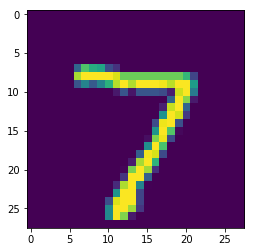

[[2.13106856e-15]
 [1.35538487e-22]
 [8.08398850e-19]
 [1.08379718e-11]
 [7.52061412e-14]
 [1.75198722e-11]
 [9.19035842e-27]
 [9.99999897e-01]
 [8.60334259e-11]
 [1.03015229e-07]]
2


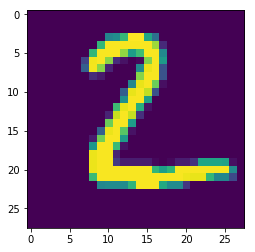

[[4.83483450e-12]
 [2.07362915e-20]
 [9.99986874e-01]
 [1.31257918e-05]
 [2.60138886e-48]
 [3.30070776e-15]
 [1.76549024e-18]
 [2.66525978e-35]
 [1.45781067e-11]
 [7.04375867e-32]]
1


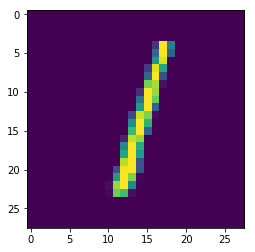

[[5.09540873e-20]
 [9.99807713e-01]
 [1.67126677e-04]
 [3.81780925e-08]
 [3.88282085e-13]
 [1.76106959e-15]
 [6.13899826e-09]
 [3.03637560e-09]
 [2.51126216e-05]
 [1.17331399e-10]]
0


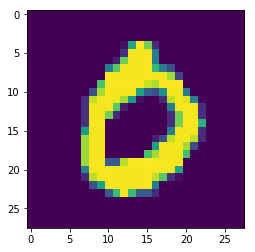

[[9.99999647e-01]
 [4.28696900e-28]
 [9.73100976e-10]
 [1.47945224e-09]
 [1.72969698e-30]
 [3.50718373e-07]
 [1.01223737e-17]
 [3.95596354e-25]
 [7.00637963e-14]
 [3.83916520e-21]]
4


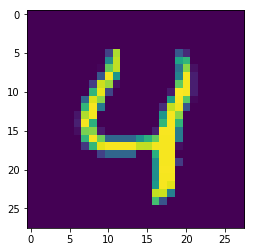

[[8.82984693e-14]
 [3.84221915e-17]
 [1.73965183e-07]
 [1.00004758e-10]
 [9.99893696e-01]
 [3.36195495e-14]
 [1.17668821e-08]
 [1.78992955e-08]
 [2.27554351e-07]
 [1.05873086e-04]]
1


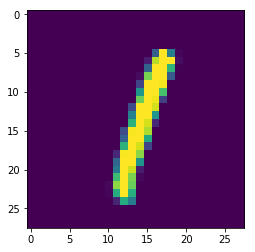

[[1.16574254e-24]
 [9.99971856e-01]
 [2.11128502e-07]
 [2.34939199e-08]
 [5.31998781e-14]
 [5.20236671e-18]
 [5.48552581e-13]
 [3.39805723e-07]
 [2.75669873e-05]
 [2.57994989e-09]]
4


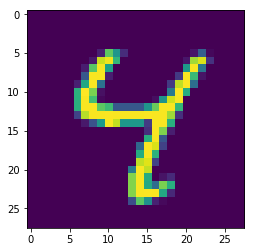

[[4.27209709e-19]
 [2.50075049e-22]
 [3.76434691e-25]
 [9.22990316e-20]
 [9.99995246e-01]
 [1.76542647e-06]
 [6.74886382e-13]
 [1.34457875e-12]
 [2.98827844e-06]
 [4.11971542e-10]]
9


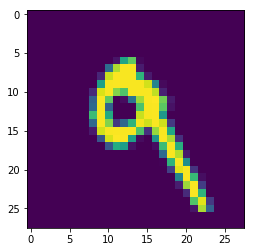

[[4.10711511e-26]
 [2.40439095e-08]
 [2.80369478e-23]
 [1.36527226e-12]
 [4.24775705e-05]
 [3.27692632e-16]
 [3.68262753e-13]
 [1.18578070e-13]
 [3.64568544e-06]
 [9.99953853e-01]]
5


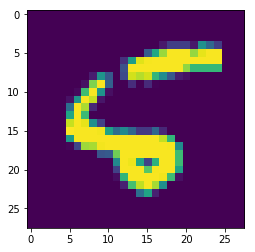

[[1.38292480e-12]
 [3.34343222e-21]
 [3.51026827e-08]
 [1.90764364e-18]
 [2.09796174e-07]
 [7.16326672e-16]
 [9.99999755e-01]
 [2.90653738e-29]
 [1.13546106e-11]
 [2.52204844e-17]]
9


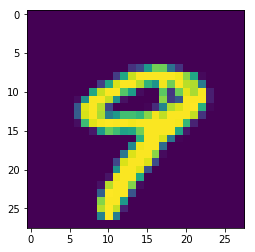

[[6.14651648e-26]
 [2.27987586e-22]
 [5.69526135e-27]
 [1.13770938e-20]
 [9.46350801e-01]
 [1.70715139e-19]
 [4.49708073e-20]
 [1.37362341e-07]
 [1.94133665e-10]
 [5.36490614e-02]]
0


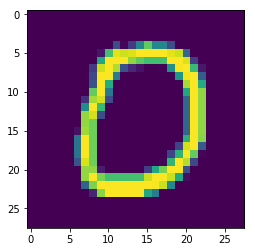

[[9.97531618e-01]
 [3.30533670e-30]
 [6.57837335e-09]
 [5.74168334e-08]
 [1.59743721e-34]
 [2.46831807e-03]
 [2.08653289e-20]
 [9.39365429e-24]
 [1.36385252e-10]
 [1.44130495e-24]]
6


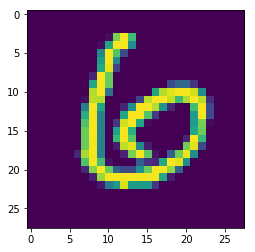

[[3.88103588e-08]
 [4.42844360e-13]
 [2.75875644e-06]
 [4.35229265e-12]
 [1.18393548e-13]
 [1.47296131e-09]
 [9.99997138e-01]
 [1.85277022e-26]
 [6.33849191e-08]
 [4.01618684e-16]]
9


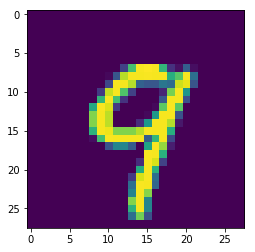

[[6.22718256e-23]
 [3.63840346e-20]
 [1.12533262e-19]
 [1.75188049e-11]
 [4.74229946e-06]
 [4.13790048e-18]
 [1.37016773e-22]
 [8.17638794e-04]
 [1.13996799e-08]
 [9.99177607e-01]]
0


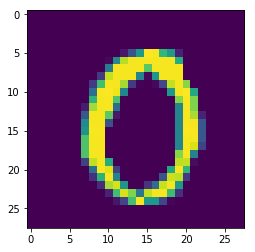

[[9.99999643e-01]
 [2.51862800e-36]
 [3.00385747e-17]
 [9.54545928e-13]
 [2.00960335e-29]
 [3.57441604e-07]
 [5.96282329e-22]
 [1.50248763e-26]
 [2.20609964e-15]
 [3.10764820e-19]]
1


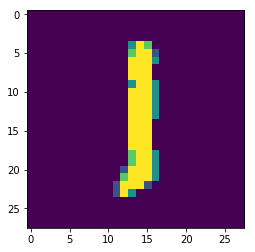

[[2.32757962e-29]
 [9.99999955e-01]
 [4.35423253e-11]
 [2.12291524e-09]
 [2.91962487e-23]
 [4.74788624e-21]
 [5.54011305e-19]
 [8.77036489e-11]
 [4.27380174e-08]
 [7.37941475e-13]]
5


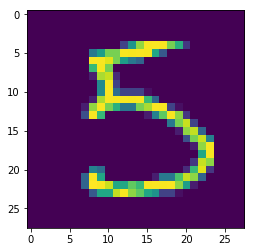

[[2.39655580e-09]
 [7.86376828e-22]
 [5.36035166e-16]
 [1.36276719e-03]
 [1.38090232e-23]
 [9.98605485e-01]
 [1.05316087e-24]
 [1.75972831e-08]
 [3.17273755e-05]
 [3.09154189e-13]]
9


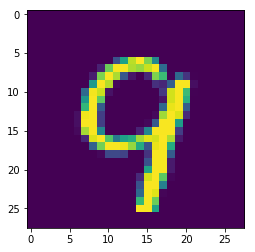

[[5.31385024e-19]
 [1.11460424e-23]
 [9.55797666e-14]
 [8.94658892e-09]
 [1.86243634e-06]
 [3.10467362e-19]
 [1.14569527e-22]
 [3.70424316e-03]
 [1.21869910e-10]
 [9.96293885e-01]]
7


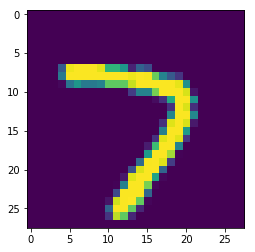

[[8.36297382e-09]
 [2.15570093e-16]
 [1.29519954e-07]
 [6.47138310e-07]
 [1.94562023e-11]
 [1.25800450e-08]
 [1.75905568e-17]
 [9.99996390e-01]
 [1.78901059e-06]
 [1.02382773e-06]]
3


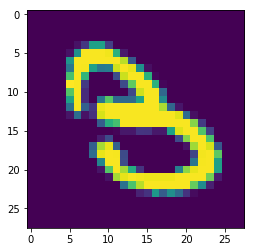

[[2.67595539e-19]
 [2.30946902e-13]
 [1.60168020e-03]
 [9.98392285e-01]
 [1.46879183e-23]
 [1.41255139e-16]
 [4.08398419e-17]
 [7.34127237e-16]
 [6.03488498e-06]
 [2.08225679e-12]]
4


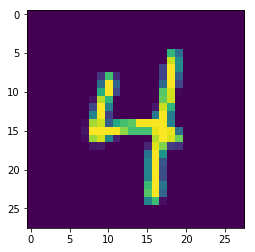

[[3.00507189e-16]
 [5.65534177e-20]
 [1.85300592e-15]
 [4.53325532e-14]
 [9.99960702e-01]
 [6.54621419e-14]
 [1.63565540e-10]
 [1.96377351e-12]
 [3.53274258e-09]
 [3.92944433e-05]]
9


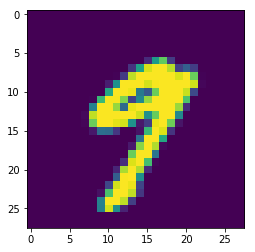

[[1.95427556e-29]
 [1.63191926e-23]
 [3.47073400e-29]
 [7.26379777e-14]
 [9.41560697e-11]
 [2.13475424e-21]
 [1.63183676e-33]
 [3.01998701e-01]
 [1.26307243e-12]
 [6.98001299e-01]]
6


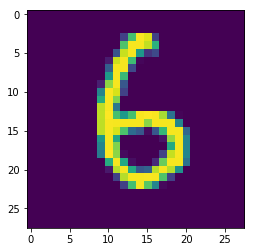

[[8.37487466e-13]
 [4.48671935e-18]
 [7.96587439e-16]
 [7.74526970e-17]
 [6.14487216e-17]
 [4.49219892e-08]
 [9.99999953e-01]
 [5.99468822e-39]
 [2.02443394e-09]
 [5.25577375e-21]]
6


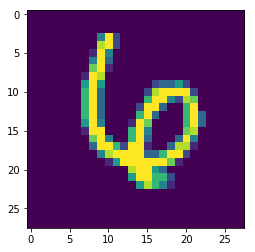

[[1.41551593e-15]
 [9.52678822e-04]
 [2.33188388e-02]
 [3.08244321e-11]
 [3.49042468e-04]
 [2.09402128e-14]
 [9.74838791e-01]
 [4.27541512e-12]
 [5.40643035e-04]
 [5.73926813e-09]]
5


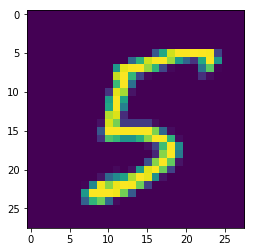

[[5.02883832e-01]
 [8.37774056e-18]
 [1.75064599e-10]
 [3.26615267e-05]
 [4.20497546e-03]
 [4.58550922e-01]
 [7.65391358e-03]
 [1.56538414e-16]
 [3.62612185e-03]
 [2.30475738e-02]]
4


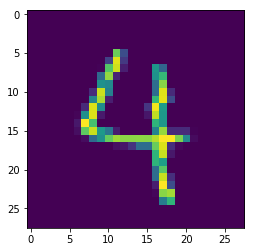

[[2.40061451e-12]
 [9.25598057e-14]
 [4.48491493e-09]
 [7.49599195e-08]
 [2.50474089e-01]
 [1.70138652e-13]
 [1.52247192e-10]
 [3.90495978e-05]
 [3.55683997e-08]
 [7.49486746e-01]]
0


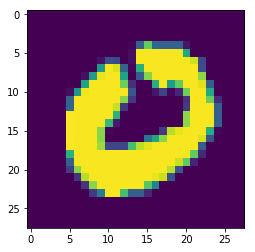

[[9.99999762e-01]
 [5.15919291e-35]
 [2.37726931e-07]
 [3.16736880e-14]
 [4.55267466e-26]
 [2.32396350e-10]
 [1.86365158e-13]
 [2.15446802e-30]
 [1.78930536e-13]
 [1.67427746e-22]]
7


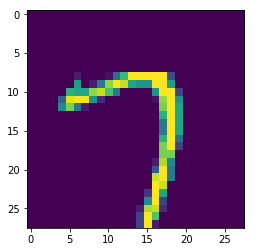

[[2.83791388e-18]
 [1.94504394e-16]
 [6.99850582e-15]
 [2.15076967e-10]
 [1.27118467e-11]
 [1.14297223e-13]
 [9.42118463e-23]
 [9.99999861e-01]
 [8.51240895e-10]
 [1.38389046e-07]]
4


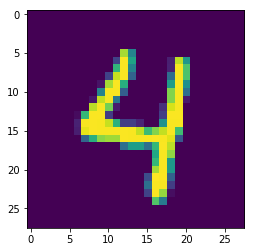

[[1.92595183e-18]
 [5.83120352e-24]
 [4.78969050e-19]
 [1.66871520e-16]
 [9.99983838e-01]
 [2.02232347e-14]
 [3.00761032e-13]
 [9.19191916e-13]
 [3.28533903e-09]
 [1.61585277e-05]]
0


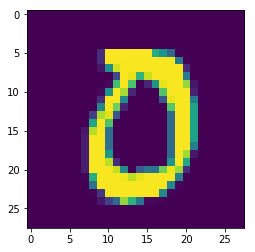

[[9.99994958e-01]
 [3.67443825e-36]
 [2.68665323e-11]
 [4.13071944e-07]
 [3.54638443e-43]
 [4.62898654e-06]
 [2.00654293e-27]
 [2.23104977e-27]
 [5.37129397e-14]
 [6.02433440e-26]]
1


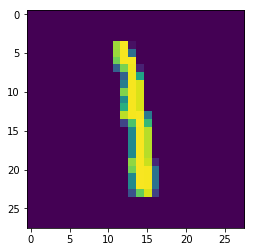

[[2.02881715e-18]
 [9.99272163e-01]
 [1.08368821e-10]
 [9.11548359e-09]
 [3.54214205e-17]
 [1.24003685e-08]
 [1.31953912e-10]
 [1.42717595e-11]
 [7.27814966e-04]
 [2.00528699e-12]]
3


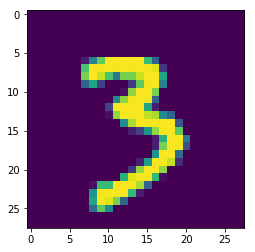

[[4.20197855e-15]
 [4.20493179e-18]
 [7.42122689e-20]
 [9.27316578e-01]
 [1.90776367e-19]
 [3.58992753e-09]
 [3.91063461e-27]
 [2.72876446e-06]
 [1.03520730e-07]
 [7.26805858e-02]]
1


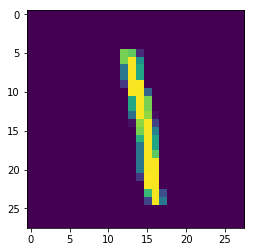

[[1.52175114e-19]
 [9.99913902e-01]
 [1.28684549e-11]
 [1.22899035e-06]
 [1.01139001e-13]
 [3.29761437e-12]
 [3.55902908e-14]
 [2.27302896e-05]
 [5.42252676e-05]
 [7.91391671e-06]]
3


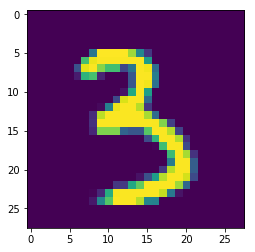

[[2.91976990e-10]
 [2.96739701e-18]
 [7.71384884e-11]
 [9.85246535e-01]
 [3.98841208e-24]
 [2.98172523e-03]
 [5.26156683e-16]
 [3.52796625e-19]
 [1.17717397e-02]
 [1.94668260e-12]]
4


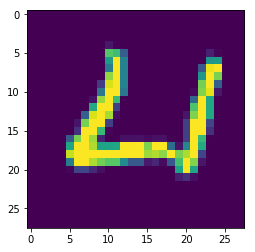

[[8.38897291e-01]
 [2.05396732e-14]
 [3.91730627e-06]
 [6.10875862e-09]
 [3.10289213e-09]
 [1.72878635e-03]
 [1.59368397e-01]
 [4.87831961e-19]
 [1.59881854e-06]
 [2.83854652e-11]]
7


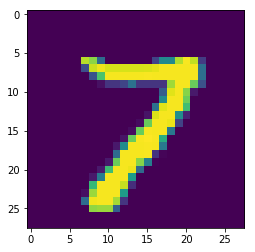

[[4.06191365e-36]
 [1.59772721e-20]
 [1.01560547e-16]
 [3.50748489e-13]
 [1.53137664e-19]
 [5.31742340e-30]
 [8.46646215e-35]
 [9.99999997e-01]
 [3.74381858e-12]
 [2.52966589e-09]]
2


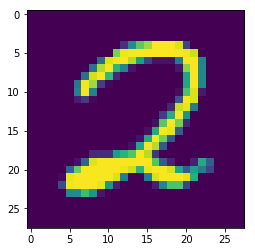

[[1.62543278e-09]
 [2.33530823e-19]
 [9.99990192e-01]
 [1.67576623e-07]
 [4.77681647e-29]
 [1.64969076e-07]
 [3.47163862e-15]
 [1.12539596e-17]
 [9.47348199e-06]
 [1.03353244e-25]]
7


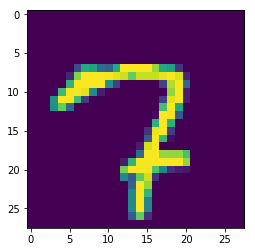

[[2.86643615e-17]
 [3.20933522e-17]
 [6.08522186e-09]
 [6.67131316e-06]
 [1.46889413e-13]
 [8.63765649e-15]
 [1.68049812e-22]
 [9.99991453e-01]
 [8.59568528e-08]
 [1.78356695e-06]]
1


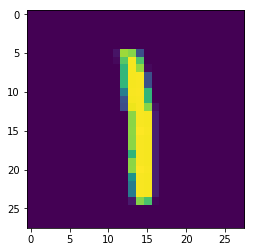

[[9.40028315e-26]
 [9.99994235e-01]
 [2.07711760e-13]
 [8.60733523e-12]
 [2.00698046e-18]
 [1.31087328e-14]
 [1.01696383e-13]
 [1.35967206e-12]
 [5.76518507e-06]
 [1.49229110e-13]]
2


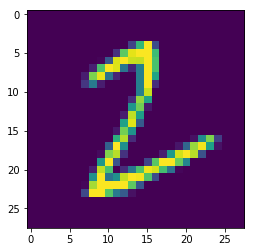

[[1.87965686e-05]
 [1.56073205e-12]
 [3.63919137e-04]
 [9.99611857e-01]
 [4.18658387e-27]
 [2.75302518e-06]
 [8.82989593e-13]
 [7.26405429e-19]
 [2.67431647e-06]
 [4.29359917e-14]]
1


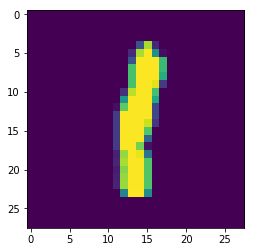

[[9.94834443e-30]
 [9.99999119e-01]
 [6.98955608e-09]
 [6.17950575e-10]
 [6.29201526e-23]
 [9.82015378e-21]
 [6.65539300e-16]
 [8.38985665e-14]
 [8.73654738e-07]
 [4.37221579e-15]]
1


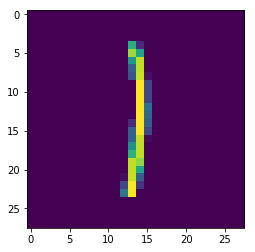

[[4.63126754e-15]
 [9.99843063e-01]
 [1.43962717e-06]
 [1.79414285e-09]
 [6.58236452e-11]
 [8.33661389e-10]
 [6.63715554e-05]
 [9.05790273e-12]
 [8.91235511e-05]
 [5.68864682e-11]]
7


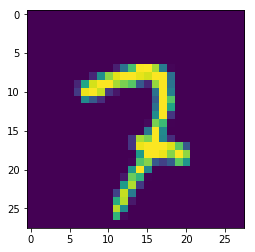

[[8.31226679e-10]
 [8.05157497e-13]
 [3.03168026e-07]
 [6.54561238e-03]
 [2.66104129e-08]
 [1.66807155e-11]
 [2.05479692e-14]
 [2.69374421e-03]
 [6.20824857e-07]
 [9.90759692e-01]]
4


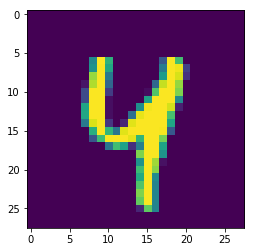

[[2.61587922e-31]
 [1.22307980e-16]
 [2.89580393e-21]
 [3.08981512e-18]
 [9.99991282e-01]
 [7.27924928e-20]
 [2.06764756e-17]
 [1.10601673e-06]
 [3.43771362e-07]
 [7.26794096e-06]]
2


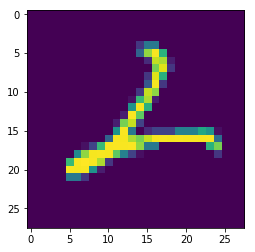

[[8.95448272e-03]
 [2.30754660e-14]
 [5.42425732e-01]
 [4.48114154e-01]
 [1.00362427e-16]
 [3.69774950e-04]
 [8.85103882e-10]
 [6.51522779e-12]
 [1.35855382e-04]
 [2.12223492e-11]]
3


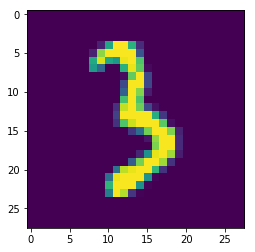

[[5.49519135e-05]
 [1.30963534e-06]
 [5.91973863e-09]
 [1.11588278e-01]
 [7.85831179e-11]
 [6.73896418e-01]
 [2.21250430e-04]
 [1.74964812e-14]
 [2.13930962e-01]
 [3.06823880e-04]]
5


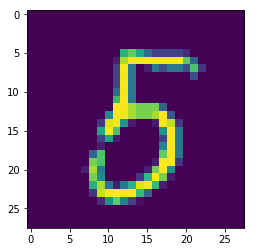

[[2.96032205e-07]
 [2.17714962e-20]
 [2.19445712e-15]
 [3.35043840e-08]
 [8.54504988e-19]
 [9.99930758e-01]
 [6.67968850e-12]
 [9.92376572e-22]
 [6.89126268e-05]
 [1.20383391e-14]]
1


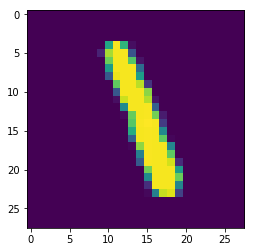

[[2.85792527e-25]
 [9.99949786e-01]
 [4.26309417e-12]
 [1.34142046e-05]
 [7.19124226e-20]
 [7.82576179e-16]
 [3.40854490e-16]
 [2.88501598e-11]
 [3.67620489e-05]
 [3.75958010e-08]]
2


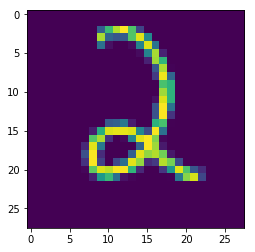

[[1.00411018e-13]
 [1.42229788e-10]
 [9.99994355e-01]
 [5.93715244e-08]
 [7.87163713e-16]
 [1.91391913e-17]
 [5.57702596e-06]
 [7.83332139e-20]
 [7.97408770e-09]
 [4.95238713e-14]]
4


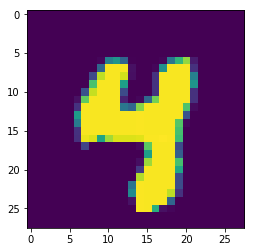

[[1.62822851e-39]
 [3.39392736e-34]
 [5.98524176e-39]
 [5.88306959e-29]
 [9.99999754e-01]
 [5.35244693e-26]
 [1.62996795e-25]
 [1.12941076e-18]
 [1.13879993e-14]
 [2.45830658e-07]]
4


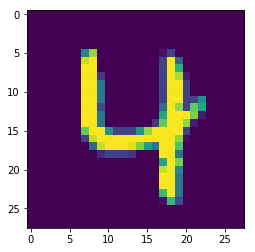

[[1.16684939e-23]
 [1.50142260e-18]
 [1.59816174e-01]
 [2.22058697e-13]
 [8.40180544e-01]
 [1.56962332e-25]
 [3.39553295e-11]
 [2.75219965e-06]
 [3.15335033e-08]
 [4.98256839e-07]]
6


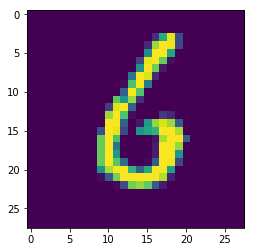

[[9.00186954e-08]
 [4.32427967e-20]
 [3.14565480e-06]
 [7.11291153e-13]
 [1.69941439e-13]
 [9.15631118e-11]
 [9.99996764e-01]
 [1.21924916e-31]
 [1.43073037e-10]
 [1.27942949e-18]]
3


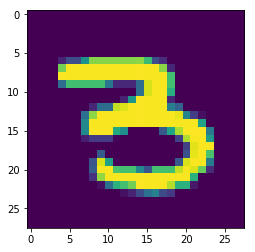

[[1.01660323e-10]
 [1.08628690e-20]
 [5.09175217e-08]
 [9.99998649e-01]
 [2.37992001e-27]
 [3.51977530e-09]
 [1.31038903e-19]
 [1.95447729e-18]
 [1.29669128e-06]
 [1.81914696e-13]]
5


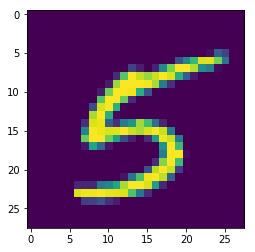

[[1.27163402e-04]
 [3.63419126e-16]
 [6.02490043e-19]
 [1.57021556e-10]
 [6.53216142e-06]
 [9.99779311e-01]
 [2.87862187e-07]
 [2.99114245e-15]
 [2.32907587e-05]
 [6.34150695e-05]]
5


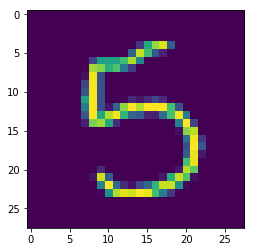

[[4.02935147e-10]
 [3.78573261e-18]
 [6.94040334e-16]
 [1.31492946e-10]
 [1.04251662e-11]
 [9.99435858e-01]
 [2.29524240e-12]
 [3.19618985e-13]
 [5.64141551e-04]
 [1.89392461e-13]]
6


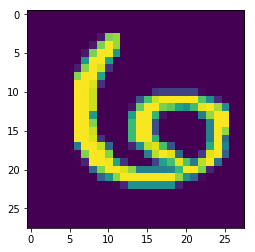

[[1.48117896e-17]
 [3.33988668e-12]
 [9.99619596e-01]
 [1.46615723e-11]
 [3.27686070e-16]
 [1.78678024e-19]
 [3.80388228e-04]
 [1.00064192e-24]
 [1.59988560e-08]
 [2.38120993e-18]]
0


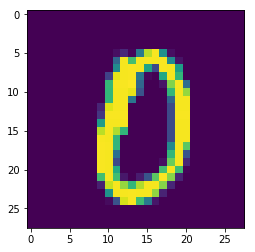

[[9.99994658e-01]
 [6.97845514e-31]
 [1.20354673e-11]
 [1.96528873e-12]
 [1.22068124e-26]
 [5.34187074e-06]
 [3.33444607e-11]
 [8.72862692e-34]
 [5.99424517e-12]
 [1.25714003e-21]]
4


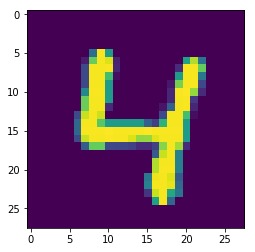

[[1.72156531e-26]
 [9.93688572e-34]
 [7.60448433e-25]
 [2.91997402e-28]
 [1.00000000e+00]
 [9.81972121e-25]
 [1.10254507e-14]
 [2.16833070e-23]
 [2.58672250e-17]
 [1.62380973e-12]]
1


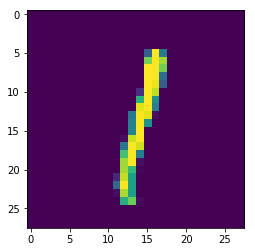

[[9.14779573e-19]
 [9.99868652e-01]
 [7.91539472e-05]
 [3.85164876e-06]
 [2.28492787e-13]
 [7.83852874e-15]
 [1.86600199e-10]
 [3.27554642e-07]
 [4.79919189e-05]
 [2.26193073e-08]]
9


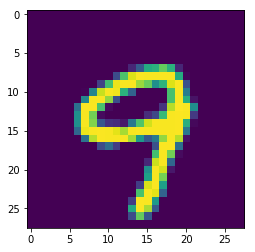

[[2.39434910e-24]
 [1.31488642e-23]
 [5.38797754e-25]
 [5.71774458e-17]
 [1.70688525e-03]
 [7.53338036e-21]
 [4.70189070e-23]
 [3.25138674e-06]
 [1.44820219e-12]
 [9.98289863e-01]]
5


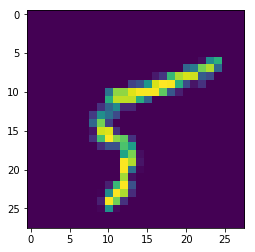

[[4.47865881e-07]
 [3.25048504e-07]
 [1.16286074e-09]
 [9.24692398e-06]
 [5.52630624e-05]
 [8.78702526e-03]
 [8.54584190e-10]
 [9.80625621e-01]
 [8.84930668e-03]
 [1.67276169e-03]]
7


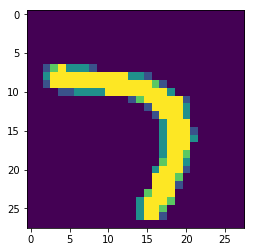

[[3.56472872e-26]
 [4.71643616e-19]
 [9.35606445e-20]
 [1.48476965e-10]
 [5.37877507e-19]
 [2.47508091e-18]
 [4.12969740e-32]
 [9.99999998e-01]
 [7.33930360e-12]
 [2.21659812e-09]]
8


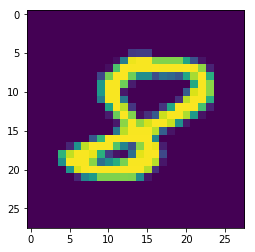

[[1.04753385e-09]
 [3.35975647e-16]
 [6.17090467e-09]
 [1.06110014e-09]
 [5.75970951e-14]
 [6.10267936e-05]
 [5.28311162e-07]
 [1.86581921e-18]
 [9.99938437e-01]
 [1.10832224e-12]]
9


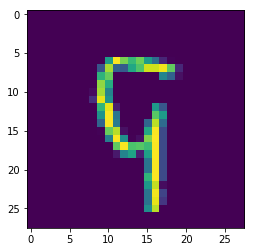

[[1.00480878e-15]
 [2.36617010e-15]
 [5.38828808e-15]
 [6.06742120e-08]
 [6.85883853e-03]
 [6.41142355e-13]
 [3.47564100e-13]
 [3.14633864e-08]
 [5.13280921e-08]
 [9.93141018e-01]]
3


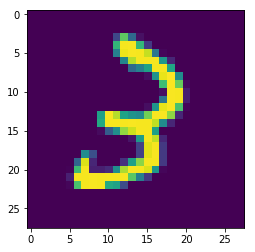

[[3.72403687e-12]
 [9.47700460e-12]
 [6.70574991e-01]
 [3.22073919e-01]
 [6.33764257e-23]
 [1.35379863e-10]
 [5.03225600e-12]
 [4.08797545e-16]
 [7.35108944e-03]
 [2.79109411e-13]]
7


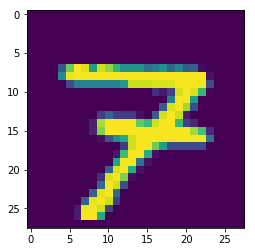

[[4.78167556e-25]
 [6.44300913e-24]
 [1.42105930e-13]
 [5.41537595e-14]
 [2.88155114e-07]
 [2.34009804e-22]
 [1.36492866e-24]
 [9.99987196e-01]
 [1.04687401e-09]
 [1.25145459e-05]]
4


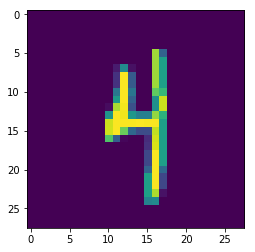

[[7.55466702e-10]
 [5.29995379e-13]
 [8.97044181e-14]
 [7.69598821e-09]
 [9.66881790e-01]
 [3.37831742e-07]
 [3.84434680e-04]
 [7.17749990e-15]
 [3.91801731e-05]
 [3.26942492e-02]]
6


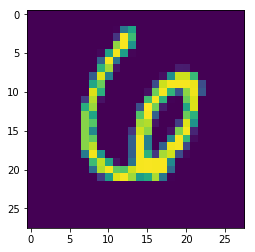

[[1.85682791e-07]
 [8.03650303e-08]
 [1.52521971e-04]
 [2.66115763e-10]
 [3.13672086e-03]
 [4.40108971e-08]
 [9.96650374e-01]
 [9.11948487e-12]
 [6.00356995e-05]
 [3.68582083e-08]]
4


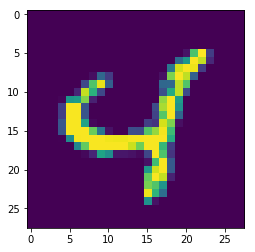

[[1.43150009e-23]
 [3.71493929e-22]
 [6.39487858e-13]
 [5.99356266e-18]
 [9.99998639e-01]
 [1.82062854e-24]
 [8.90482662e-14]
 [2.33794118e-11]
 [4.62787315e-13]
 [1.36056444e-06]]
3


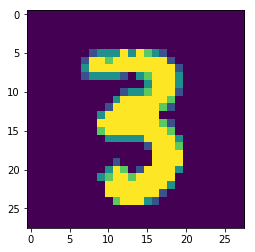

[[5.40362671e-14]
 [1.66816895e-22]
 [1.05290876e-12]
 [9.99769185e-01]
 [5.97807591e-22]
 [4.98571927e-09]
 [1.83183549e-19]
 [8.10252402e-19]
 [2.30793536e-04]
 [1.63278809e-08]]
0


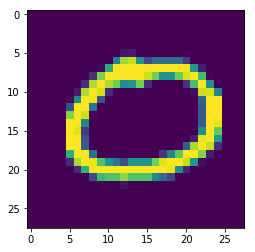

[[9.99488275e-01]
 [8.87563893e-25]
 [2.25140909e-11]
 [2.47875397e-11]
 [6.03543851e-28]
 [5.11724892e-04]
 [2.21829909e-14]
 [6.68893418e-25]
 [1.07849657e-11]
 [1.03235721e-21]]
7


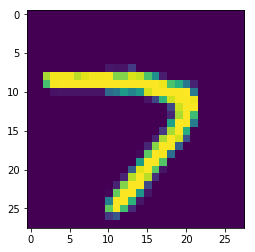

[[2.53700567e-09]
 [1.56935266e-15]
 [7.48924480e-09]
 [1.25820624e-07]
 [2.04293849e-11]
 [2.15142139e-09]
 [9.71447219e-18]
 [9.99996958e-01]
 [2.03259921e-07]
 [2.70026011e-06]]
0


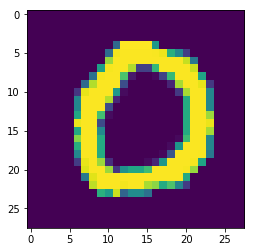

[[9.99999917e-01]
 [1.42346584e-44]
 [1.20314574e-17]
 [1.06404972e-14]
 [4.84144405e-48]
 [8.32279875e-08]
 [1.27063126e-27]
 [4.65363310e-40]
 [6.90906356e-20]
 [9.40668032e-34]]
2


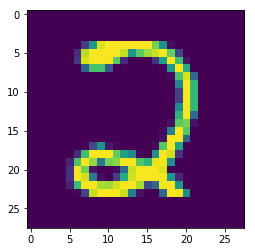

[[2.06075221e-05]
 [1.11118162e-27]
 [9.99979278e-01]
 [1.13850766e-07]
 [1.99002269e-37]
 [1.88443787e-10]
 [8.47562417e-18]
 [2.15542562e-27]
 [3.98888886e-12]
 [9.14136769e-30]]
9


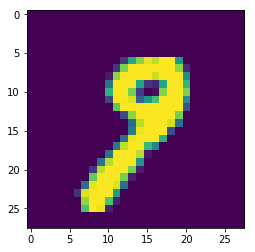

[[5.28681820e-39]
 [1.61039800e-05]
 [5.49553759e-17]
 [8.09364567e-09]
 [4.90157688e-15]
 [6.84306030e-27]
 [8.95866765e-27]
 [9.35373259e-01]
 [5.31154075e-04]
 [6.40794747e-02]]
1


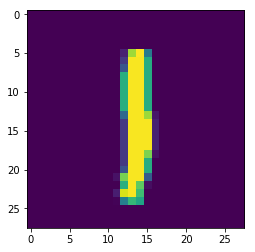

[[4.98845272e-26]
 [9.99973853e-01]
 [3.42452102e-14]
 [1.23953845e-12]
 [1.80764598e-17]
 [4.69438739e-14]
 [2.77042979e-13]
 [1.99253241e-12]
 [2.61467400e-05]
 [1.71835863e-13]]
7


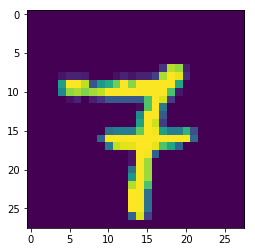

[[2.68309322e-32]
 [5.78411579e-17]
 [4.38824042e-20]
 [1.46594803e-16]
 [9.27122275e-13]
 [7.47748478e-24]
 [1.76741521e-28]
 [9.99999999e-01]
 [9.39367059e-12]
 [1.02295926e-09]]
3


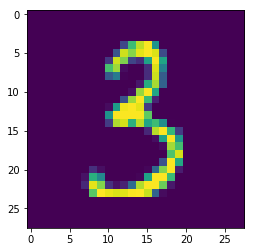

[[1.63731364e-10]
 [2.58741066e-12]
 [2.20990266e-07]
 [9.98005617e-01]
 [1.91516225e-25]
 [1.99935755e-04]
 [3.79591144e-17]
 [1.09466814e-12]
 [1.79422605e-03]
 [9.78756935e-14]]
2


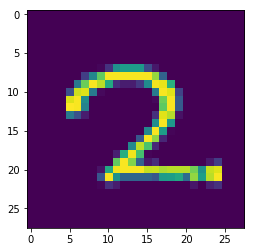

[[7.63051728e-15]
 [3.35009488e-07]
 [9.99958163e-01]
 [5.58143791e-07]
 [5.70606511e-09]
 [1.05245267e-14]
 [8.81909560e-09]
 [1.68568184e-05]
 [2.40676890e-05]
 [5.16715957e-09]]
9


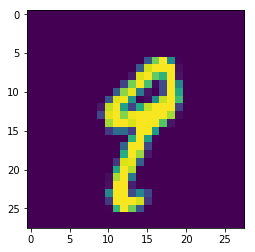

[[2.51003797e-27]
 [9.45988146e-04]
 [8.08059247e-13]
 [2.44007565e-06]
 [9.60670363e-07]
 [3.91022494e-17]
 [2.18841459e-14]
 [1.51511467e-04]
 [1.47729802e-01]
 [8.51169297e-01]]
7


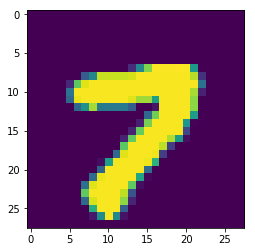

[[1.42357665e-41]
 [1.21570752e-29]
 [4.01890533e-29]
 [1.85204216e-23]
 [2.66128223e-19]
 [1.67815743e-34]
 [2.75420269e-43]
 [1.00000000e+00]
 [3.72904046e-19]
 [2.11491657e-11]]
7


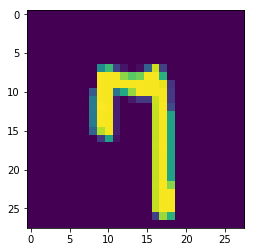

[[4.92127032e-18]
 [4.34159134e-18]
 [5.70325274e-21]
 [2.76827862e-07]
 [6.44510448e-10]
 [1.20314110e-13]
 [1.35673849e-24]
 [2.07935263e-02]
 [9.52369843e-11]
 [9.79206196e-01]]
6


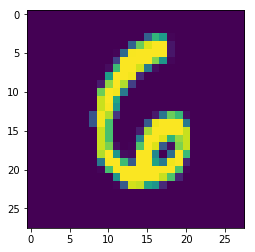

[[3.87557485e-02]
 [9.54020300e-16]
 [1.66136273e-04]
 [1.33256309e-06]
 [1.19348037e-08]
 [3.79459982e-03]
 [9.55889233e-01]
 [5.26518604e-20]
 [1.39293714e-03]
 [4.43832533e-10]]
2


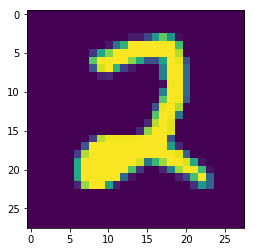

[[1.64394156e-30]
 [5.79054144e-25]
 [1.00000000e+00]
 [5.17659769e-11]
 [3.77534298e-41]
 [2.83080426e-30]
 [1.78174580e-25]
 [1.99747794e-28]
 [2.04366144e-13]
 [1.20634111e-32]]
7


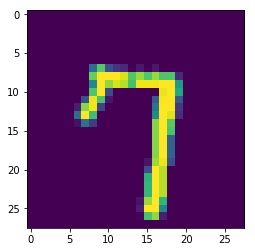

[[5.70533429e-18]
 [3.36953467e-20]
 [4.71978429e-20]
 [2.26041397e-09]
 [1.21299791e-11]
 [5.60535797e-13]
 [2.20807553e-26]
 [9.99674533e-01]
 [8.93940684e-11]
 [3.25465003e-04]]
8


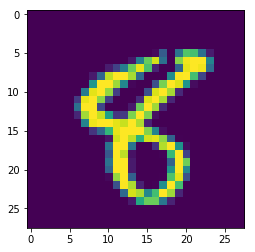

[[4.41845369e-18]
 [5.88761771e-16]
 [1.39524183e-17]
 [1.14974920e-19]
 [4.26407673e-03]
 [6.76476552e-08]
 [9.84209784e-01]
 [3.25013178e-25]
 [1.15260720e-02]
 [8.83612336e-14]]
4


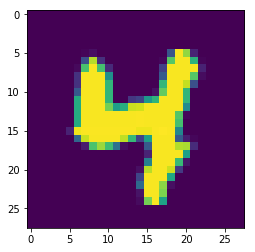

[[8.78091031e-37]
 [1.07625159e-37]
 [1.47448918e-37]
 [3.07445018e-31]
 [1.00000000e+00]
 [2.02572676e-26]
 [5.72525009e-21]
 [5.00598553e-27]
 [1.61259802e-17]
 [1.79056168e-11]]
7


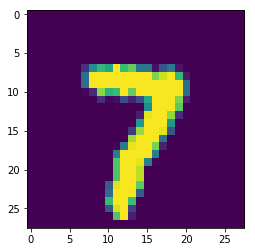

[[2.15954136e-36]
 [7.58829340e-17]
 [8.90811052e-21]
 [3.13208211e-15]
 [9.47025278e-22]
 [5.70863395e-27]
 [3.11932359e-35]
 [1.00000000e+00]
 [1.10839857e-12]
 [9.66878345e-12]]
3


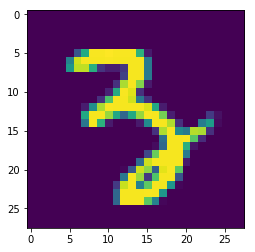

[[7.18126511e-04]
 [1.08064485e-22]
 [1.19399452e-17]
 [1.31066972e-05]
 [1.21097674e-16]
 [9.99268484e-01]
 [1.13138774e-14]
 [1.41197407e-18]
 [2.74379146e-07]
 [8.13515455e-09]]
6


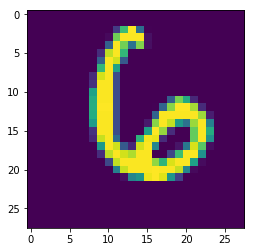

[[3.50973404e-16]
 [1.58579664e-21]
 [9.28408040e-14]
 [3.05266631e-23]
 [2.31866191e-10]
 [2.97377980e-17]
 [1.00000000e+00]
 [2.88539570e-36]
 [1.05115397e-14]
 [9.87187107e-22]]
1


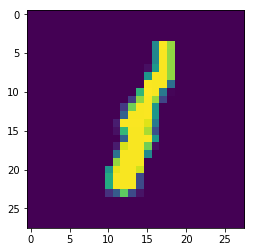

[[6.44799091e-28]
 [9.99983667e-01]
 [1.13059145e-07]
 [3.20764783e-12]
 [1.59842734e-14]
 [2.90226825e-19]
 [7.79091012e-10]
 [2.74702872e-13]
 [1.62195481e-05]
 [6.19333342e-14]]
3


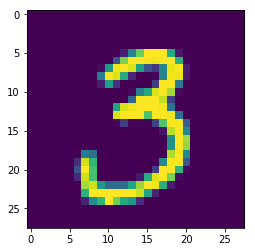

[[9.93424254e-15]
 [4.94280206e-24]
 [1.56310510e-11]
 [9.99999995e-01]
 [1.00908325e-35]
 [7.03410967e-11]
 [5.53743891e-31]
 [9.06444833e-14]
 [5.38476602e-09]
 [1.60423777e-16]]
6


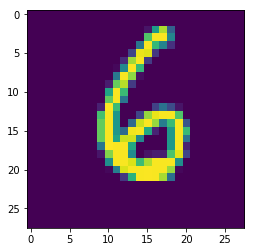

[[2.75406411e-23]
 [2.43163857e-11]
 [4.40671292e-10]
 [1.23961372e-18]
 [1.02815284e-11]
 [4.81638287e-19]
 [9.99999994e-01]
 [2.07673470e-31]
 [5.38172808e-09]
 [4.56373662e-19]]
9


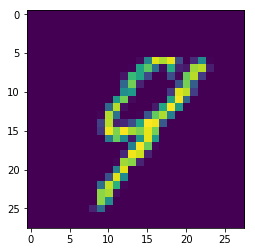

[[4.01100545e-22]
 [1.67381738e-05]
 [1.03806981e-09]
 [1.38400286e-10]
 [9.61617822e-01]
 [7.12292508e-17]
 [1.28145832e-07]
 [3.51230014e-06]
 [2.38449443e-03]
 [3.59773034e-02]]
3


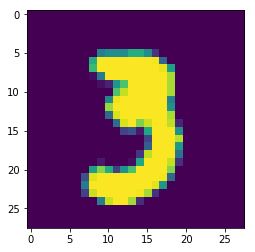

[[1.54884144e-18]
 [3.56408367e-20]
 [1.90095299e-18]
 [9.99999927e-01]
 [1.50820039e-31]
 [1.91651967e-11]
 [7.46884425e-32]
 [9.54333054e-12]
 [7.12623637e-08]
 [1.22064957e-09]]
1


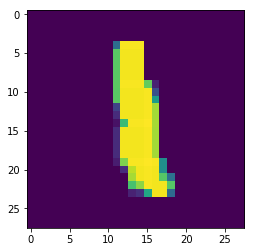

[[1.06156317e-35]
 [9.99999575e-01]
 [6.15911823e-16]
 [3.89045945e-16]
 [8.61195109e-23]
 [9.38330546e-21]
 [5.21993173e-15]
 [1.07655170e-19]
 [4.25310337e-07]
 [9.70809061e-19]]
4


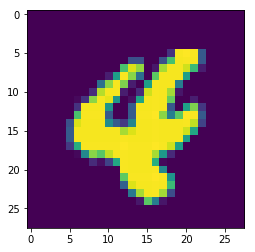

[[1.92735933e-29]
 [8.82862635e-20]
 [1.52705259e-16]
 [1.84202819e-23]
 [9.99999996e-01]
 [5.17783724e-27]
 [2.88283425e-09]
 [1.22912663e-19]
 [2.33516536e-11]
 [1.16527743e-09]]
1


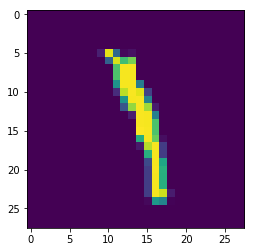

[[4.76731098e-21]
 [9.98742409e-01]
 [7.57675021e-15]
 [4.29509797e-07]
 [2.89542690e-12]
 [5.47682182e-11]
 [2.98093387e-15]
 [3.05216337e-04]
 [6.59445648e-04]
 [2.92499438e-04]]
7


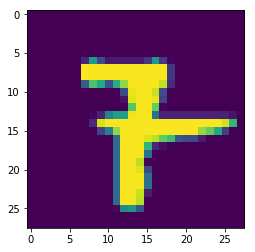

[[6.54559431e-20]
 [5.22012972e-07]
 [1.67116247e-09]
 [2.36592795e-05]
 [4.35520210e-07]
 [5.76046754e-12]
 [3.35977287e-14]
 [2.98159042e-01]
 [6.85034609e-01]
 [1.67817311e-02]]
6


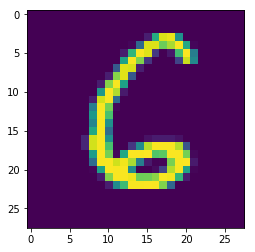

[[1.24310600e-02]
 [4.50430957e-14]
 [1.42897135e-04]
 [1.91242916e-10]
 [7.57513017e-18]
 [1.00300458e-01]
 [8.87071319e-01]
 [1.06934697e-25]
 [5.42659078e-05]
 [2.80607816e-20]]
9


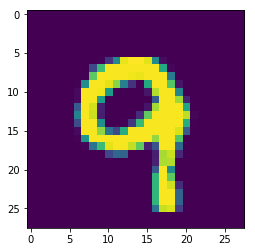

[[8.46712228e-35]
 [4.31756490e-22]
 [2.84741516e-17]
 [9.74953623e-14]
 [2.44607692e-05]
 [5.62342667e-32]
 [9.17787669e-26]
 [7.27125876e-05]
 [2.28461097e-12]
 [9.99902827e-01]]


In [12]:

#Viewing sample images
sample =  X_Test[:,0]
sample2 = X_Test[:,1]
sample3 = X_Test[:,2]
samples = []
for i in range(100):
    samples.append(X_Test[:,i])
#vectors = [X_Test[:,0],X_Test[:,1],X_Test[:,2]]
for x in range(100):
    #Actual Power
    print(Y_Test[x])
    plt.imshow(X_Test[:,x].reshape(28,28))
    plt.show()
    print(neuralnetwork.predict(X_Test[:,x].reshape(784,1)))


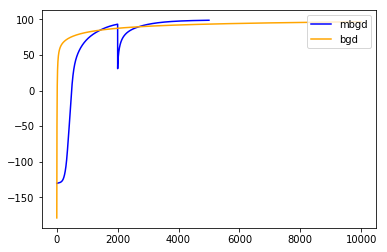

In [10]:
bgd_acc = pickle.load(open( "BGD.pkl", "rb"))
mbgd_acc = pickle.load(open("MBGD.pkl", "rb"))


plt.plot(mbgd_acc, "blue", label="mbgd")
plt.plot(bgd_acc, "orange", label="bgd")
plt.legend(loc="upper right")
plt.show()

In [7]:
labels = [[1,2,4,5]]
arr = [2,2,3,4]
    
labels.append(arr)
labels = np.array(labels)
labels.T

array([[1, 2],
       [2, 2],
       [4, 3],
       [5, 4]])